In [1]:
import anndata as ad
import scanpy as sc
sc_file="D:\pythonplaces\MACD_github\Datasets\Real_datasets\dataset1\scRNA.h5ad"
adata1 = ad.read_h5ad(sc_file)
adata=adata1.copy()
adata


AnnData object with n_obs × n_vars = 3777 × 15323
    obs: 'cell_type'

D:\Anaconda3\envs\MACD\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


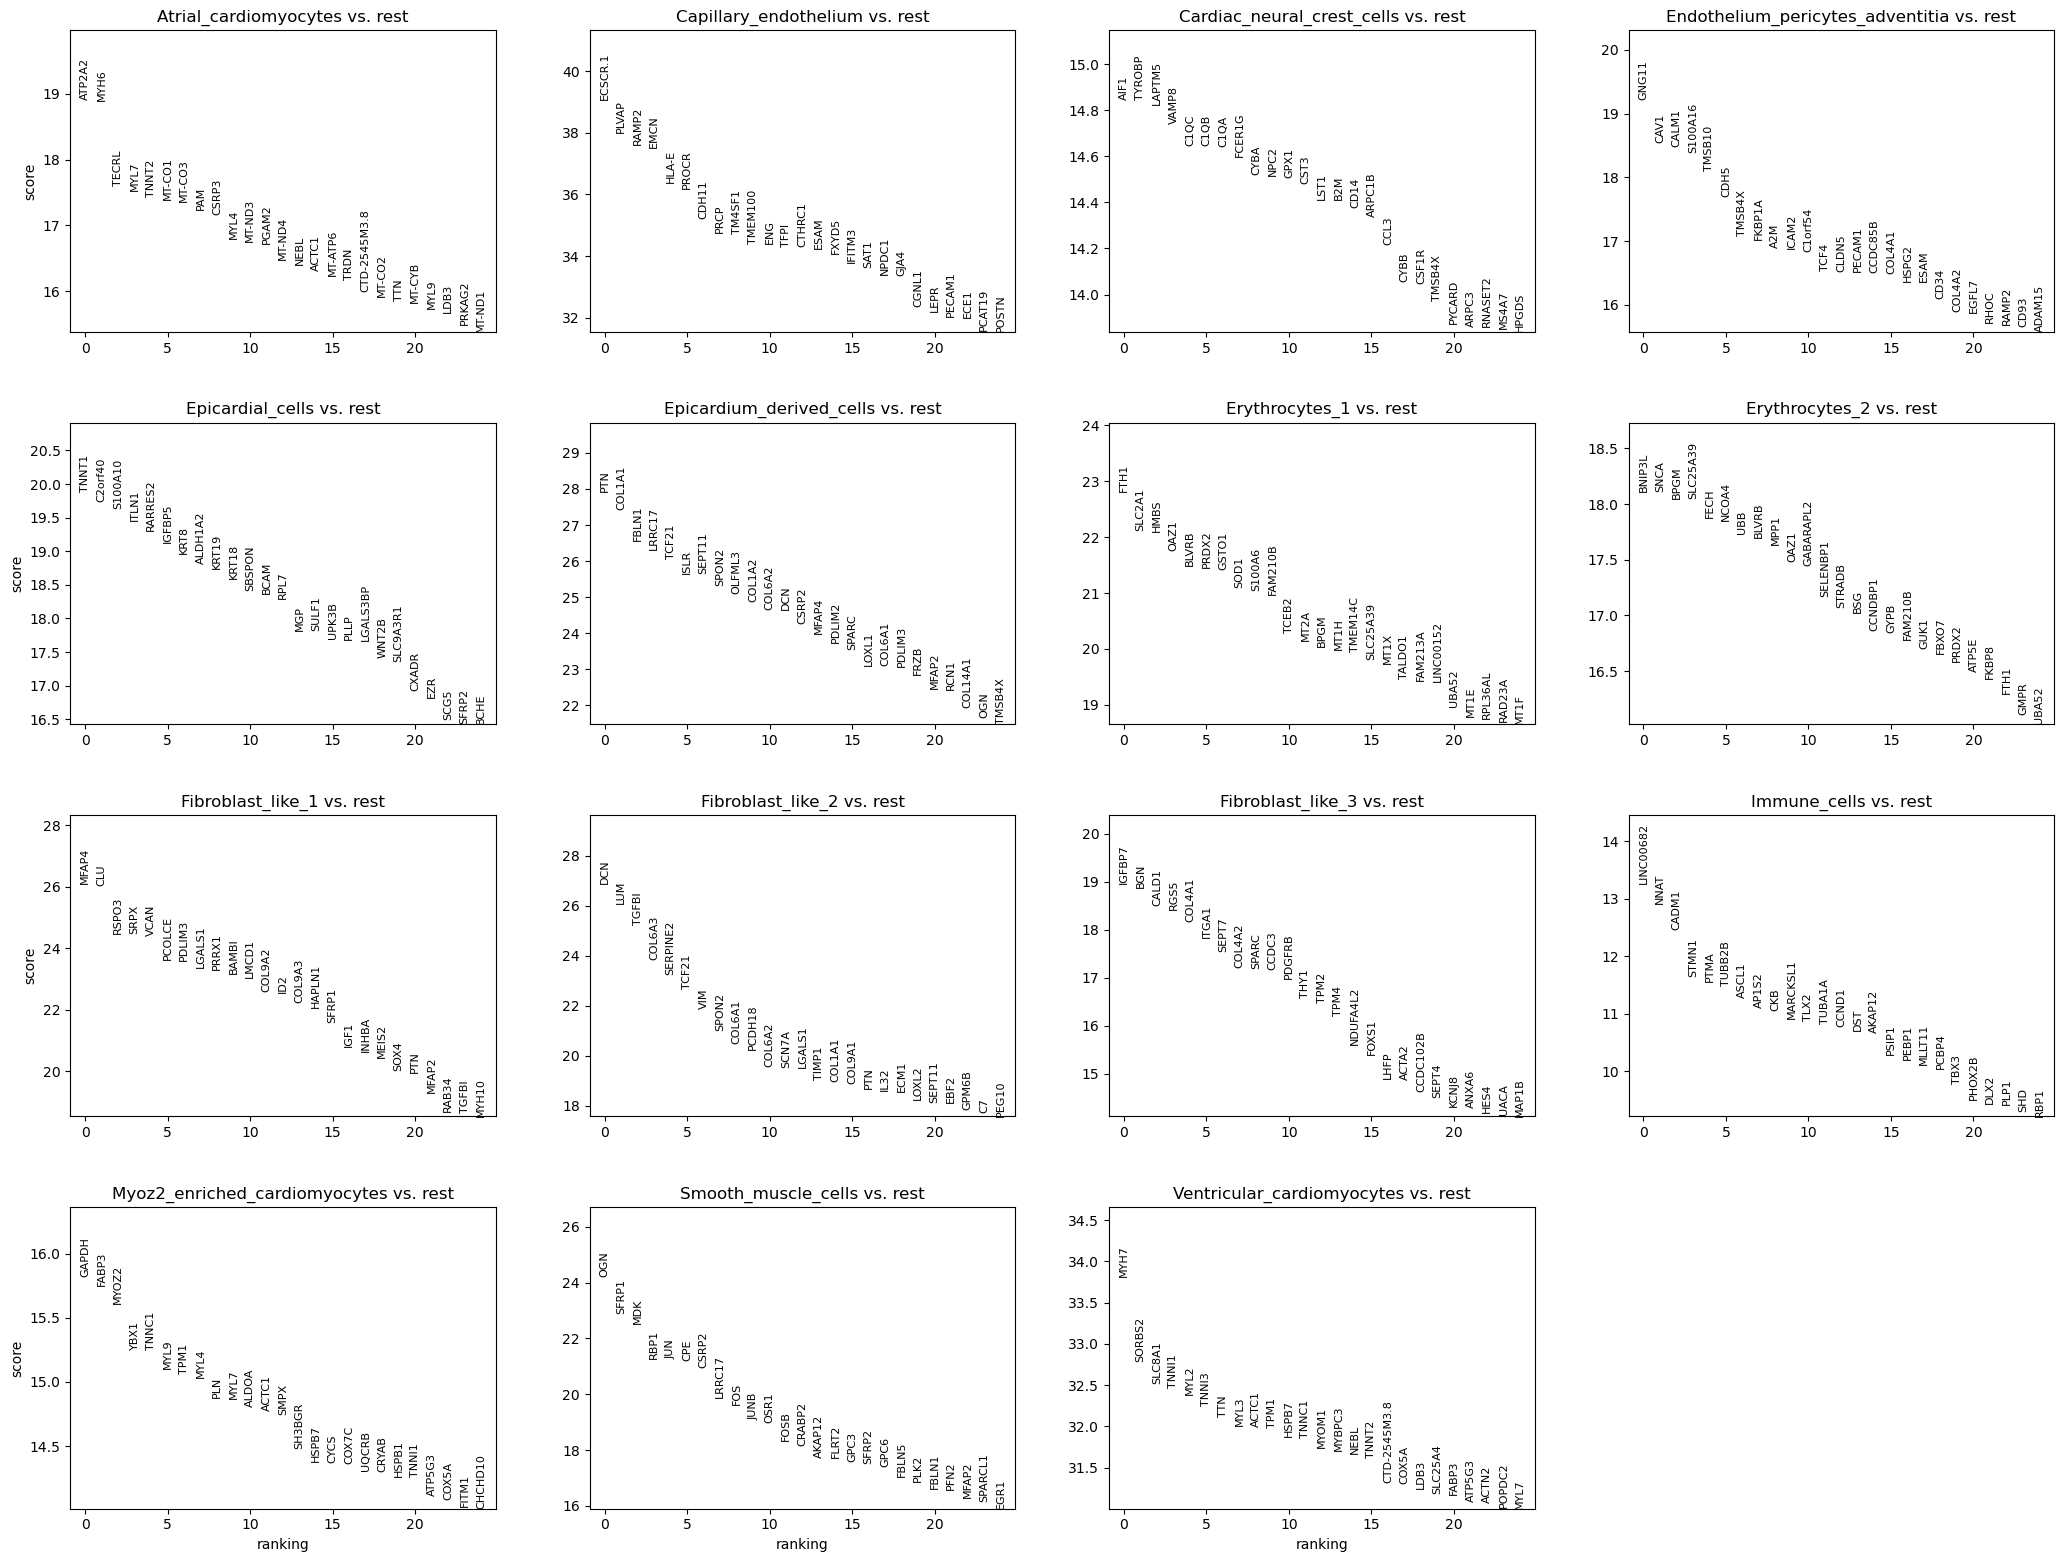

Cell type: Atrial_cardiomyocytes, Top 10 marker genes: ['ATP2A2' 'MYH6' 'TECRL' 'MYL7' 'TNNT2' 'MT-CO1' 'MT-CO3' 'PAM' 'CSRP3'
 'MYL4']
Cell type: Capillary_endothelium, Top 10 marker genes: ['ECSCR.1' 'PLVAP' 'RAMP2' 'EMCN' 'HLA-E' 'PROCR' 'CDH11' 'PRCP' 'TM4SF1'
 'TMEM100']
Cell type: Cardiac_neural_crest_cells, Top 10 marker genes: ['AIF1' 'TYROBP' 'LAPTM5' 'VAMP8' 'C1QC' 'C1QB' 'C1QA' 'FCER1G' 'CYBA'
 'NPC2']
Cell type: Endothelium_pericytes_adventitia, Top 10 marker genes: ['GNG11' 'CAV1' 'CALM1' 'S100A16' 'TMSB10' 'CDH5' 'TMSB4X' 'FKBP1A' 'A2M'
 'ICAM2']
Cell type: Epicardial_cells, Top 10 marker genes: ['TNNT1' 'C2orf40' 'S100A10' 'ITLN1' 'RARRES2' 'IGFBP5' 'KRT8' 'ALDH1A2'
 'KRT19' 'KRT18']
Cell type: Epicardium_derived_cells, Top 10 marker genes: ['PTN' 'COL1A1' 'FBLN1' 'LRRC17' 'TCF21' 'ISLR' 'SEPT11' 'SPON2' 'OLFML3'
 'COL1A2']
Cell type: Erythrocytes_1, Top 10 marker genes: ['FTH1' 'SLC2A1' 'HMBS' 'OAZ1' 'BLVRB' 'PRDX2' 'GSTO1' 'SOD1' 'S100A6'
 'FAM210B']
Cell type: Erythro

In [2]:
# print(adata.obs['celltype_new'])
sc.pp.normalize_total(adata, target_sum=1e4) # 不要和log顺序搞反了 ，这个是去文库的
sc.pp.log1p(adata)
sc.tl.rank_genes_groups(adata, 'cell_type', method='wilcoxon')
# 绘制差异表达基因结果
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
top_genes = {group: result['names'][group][:10] for group in groups}

for group, genes in top_genes.items():
    print(f"Cell type: {group}, Top 10 marker genes: {genes}")

D:\Anaconda3\envs\MACD\lib\site-packages\scanpy\plotting\_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
D:\Anaconda3\envs\MACD\lib\site-packages\scanpy\plotting\_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
D:\Anaconda3\envs\MACD\lib\site-packages\scanpy\plotting\_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


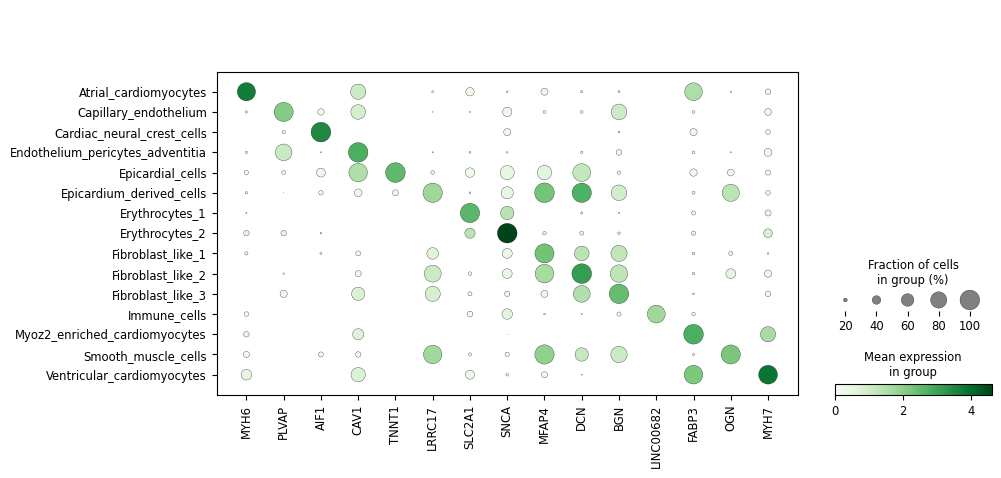

In [14]:
# adata=ad.read_h5ad('D:\pythonplaces\MACD_github\Datasets\preproced_data\dataset1\Scdata_filter.h5ad')
selected_genes = {
    'Atrial_cardiomyocytes': ['MYH6'],
    'Capillary_endothelium': ['PLVAP'],
    'Cardiac_neural_crest_cells': ['AIF1'],
    'Endothelium_pericytes_adventitia': ['CAV1'],
    'Epicardial_cells': ['TNNT1'],
    'Epicardium_derived_cells': ['LRRC17'],
    'Erythrocytes_1': ['SLC2A1'],
    'Erythrocytes_2': ['SNCA'],
    'Fibroblast_like_1': ['MFAP4'],
    'Fibroblast_like_2': ['DCN'],
    'Fibroblast_like_3': ['BGN'],
    'Immune_cells': ['LINC00682'],
    'Myoz2_enriched_cardiomyocytes': ['FABP3'],
    'Smooth_muscle_cells': ['OGN'],
    'Ventricular_cardiomyocytes': ['MYH7']
}
import matplotlib.pyplot as plt
import scanpy as sc

# 提取表达数据
genes_to_plot = [gene for genes in selected_genes.values() for gene in genes]

# 创建adata_sub的副本，以防止修改原数据
adata_sub = adata[:, genes_to_plot].copy()

# 检查'cell_types'列是否存在
if 'cell_type' not in adata.obs.columns:
    raise ValueError("'cell_type' column is not found in adata.obs")

# 去除可能的空格并统一细胞类型标签
adata.obs['cell_type'] = adata.obs['cell_type'].str.strip()

# 创建一个新的图形
fig, ax = plt.subplots(figsize=(10, 5))

# 使用scanpy绘制DotPlot，并返回轴对象
sc.pl.dotplot(
    adata_sub, 
    var_names=genes_to_plot, 
    groupby='cell_type',  # 根据细胞类型进行分组
    cmap='Greens',  # 可以选择其他配色方案，如'viridis', 'coolwarm'
    dot_max=1, 
    dot_min=0.1, 
    ax=ax,  # 在ax上绘制
    show=False  # 禁止自动显示图形
)

# 保存图形
plt.savefig("D:/pythonplaces/MACD_github/img/dataset1/spatial_composition_plots_maker.pdf", format="pdf", bbox_inches="tight")

# 显示图形
plt.show()


adata.obs['cell_type'] values: ['Erythrocytes_2', 'Epicardium_derived_cells', 'Fibroblast_like_1', 'Smooth_muscle_cells', 'Fibroblast_like_2', ..., 'Epicardial_cells', 'Ventricular_cardiomyocytes', 'Atrial_cardiomyocytes', 'Cardiac_neural_crest_cells', 'Fibroblast_like_3']
Length: 15
Categories (15, object): ['Atrial_cardiomyocytes', 'Capillary_endothelium', 'Cardiac_neural_crest_cells', 'Endothelium_pericytes_adventitia', ..., 'Immune_cells', 'Myoz2_enriched_cardiomyocytes', 'Smooth_muscle_cells', 'Ventricular_cardiomyocytes']


D:\Anaconda3\envs\MACD\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
D:\Anaconda3\envs\MACD\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


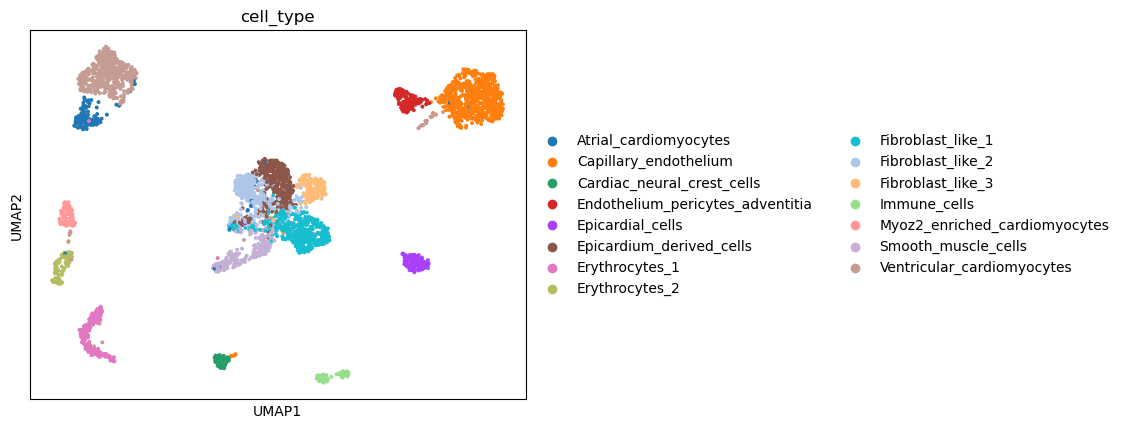

D:\Anaconda3\envs\MACD\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
D:\Anaconda3\envs\MACD\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


{'Erythrocytes_2': '#1f77b4', 'Epicardium_derived_cells': '#ff7f0e', 'Fibroblast_like_1': '#279e68', 'Smooth_muscle_cells': '#d62728', 'Fibroblast_like_2': '#aa40fc', 'Endothelium_pericytes_adventitia': '#8c564b', 'Myoz2_enriched_cardiomyocytes': '#e377c2', 'Immune_cells': '#b5bd61', 'Capillary_endothelium': '#17becf', 'Erythrocytes_1': '#aec7e8', 'Epicardial_cells': '#ffbb78', 'Ventricular_cardiomyocytes': '#98df8a', 'Atrial_cardiomyocytes': '#ff9896', 'Cardiac_neural_crest_cells': '#c5b0d5', 'Fibroblast_like_3': '#c49c94'}


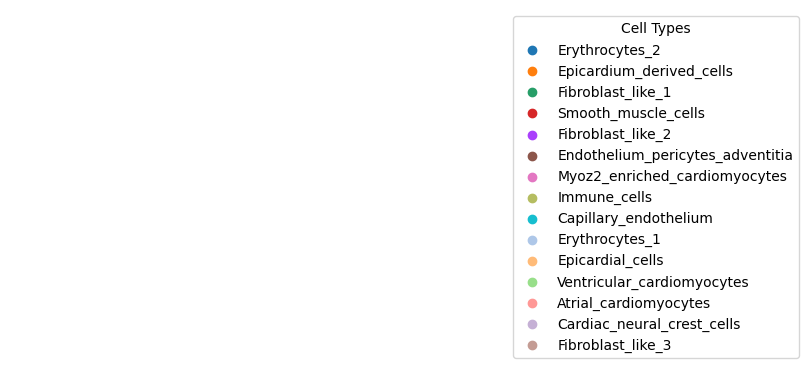

In [22]:
import scanpy as sc
import os
import matplotlib.pyplot as plt  # Ensure plt is imported

# Run UMAP
sc.pp.neighbors(adata, n_neighbors=40, n_pcs=40)
sc.tl.umap(adata)

# Check if 'cell_type' exists in adata.obs
if 'cell_type' in adata.obs:
    # Check if the UMAP plot has data
    print(f"adata.obs['cell_type'] values: {adata.obs['cell_type'].unique()}")

    # Create output directory if it doesn't exist
    output_dir = "D:/pythonplaces/MACD_github/img/dataset1/"
    os.makedirs(output_dir, exist_ok=True)

    # Create the UMAP plot and show it for debugging
    sc.pl.umap(adata, color='cell_type', show=True)  # Show the plot to ensure it's correct

    # Clear the current figure before saving
    plt.clf()

    # Save the plot to the output directory
    sc.pl.umap(adata, color='cell_type', show=False)  # Use show=False to prevent automatic display
    plt.savefig(os.path.join(output_dir, "scRNA_umap_plot.pdf"), format="pdf")
    plt.close()  # Close the plot to free memory
else:
    print("'cell_type' not found in adata.obs")

    
if 'cell_type_colors' in adata.uns:
    color_map = dict(zip(adata.obs['cell_type'].unique(), adata.uns['cell_type_colors']))
    print(color_map)
else:
    print("No color mapping found in 'adata.uns'.")
plt.gcf().savefig("D:/pythonplaces/MACD_github/img/dataset1/scRNA_umap_plot.pdf", format="pdf")
plt.close()

for cell_type, color in color_map.items():
    plt.scatter([], [], color=color, label=cell_type)  # 为空数据点创建图例

# 添加图例，分为两列
plt.legend(title="Cell Types", loc='upper left', bbox_to_anchor=(1, 1), ncol=1)


plt.axis('off')  # 可选，关闭坐标轴
plt.savefig("D:/pythonplaces/MACD_github/img/dataset1/spatial_composition_plots_cdADDA_tuli.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [18]:
import anndata as ad
from matplotlib import pyplot as plt
import numpy as np
st_file ="D:\pythonplaces\MACD_github\Datasets\preproced_data\dataset1\Real_STdata_filter.h5ad"
stadata = ad.read_h5ad(st_file)
stadata
# 选择感兴趣的基因

AnnData object with n_obs × n_vars = 209 × 2373
    obs: 'x', 'y', 'n_genes'
    layers: 'norm'

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc

# Load the spatial data
st_file = "D:\pythonplaces\MACD_github\Datasets\preproced_data\dataset1\Real_STdata_filter.h5ad"
stadata = sc.read_h5ad(st_file)
# Load the composition data (cell type proportions)
composition_data = pd.read_csv('D:\pythonplaces\MACD_github\Baselines\Spoint\Result\dataset1\proportion.csv')
# Ensure composition_data columns are in the correct order
cell_type_columns = composition_data.columns[1:]
print(cell_type_columns)
# Extract spot coordinates from stadata
coords = pd.DataFrame({
    'x': np.array(stadata.obs['x']),  # x-coordinates of spots
    'y': np.array(stadata.obs['y'])   # y-coordinates of spots
})
coords.shape,composition_data.shape

Index(['Capillary_endothelium', 'Ventricular_cardiomyocytes',
       'Fibroblast_like_1', 'Epicardium_derived_cells', 'Fibroblast_like_2',
       'Smooth_muscle_cells', 'Erythrocytes_1', 'Atrial_cardiomyocytes',
       'Fibroblast_like_3', 'Epicardial_cells',
       'Endothelium_pericytes_adventitia', 'Erythrocytes_2',
       'Myoz2_enriched_cardiomyocytes', 'Cardiac_neural_crest_cells',
       'Immune_cells'],
      dtype='object')


((209, 2), (209, 16))

In [10]:
color_map={'Erythrocytes_2': '#1f77b4', 'Epicardium_derived_cells': '#ff7f0e', 'Fibroblast_like_1': '#279e68', 'Smooth_muscle_cells': '#d62728', 'Fibroblast_like_2': '#aa40fc', 'Endothelium_pericytes_adventitia': '#8c564b', 'Myoz2_enriched_cardiomyocytes': '#e377c2', 'Immune_cells': '#b5bd61', 'Capillary_endothelium': '#17becf', 'Erythrocytes_1': '#aec7e8', 'Epicardial_cells': '#ffbb78', 'Ventricular_cardiomyocytes': '#98df8a', 'Atrial_cardiomyocytes': '#ff9896', 'Cardiac_neural_crest_cells': '#c5b0d5', 'Fibroblast_like_3': '#c49c94'}

Index(['Capillary_endothelium', 'Ventricular_cardiomyocytes',
       'Fibroblast_like_1', 'Epicardium_derived_cells', 'Fibroblast_like_2',
       'Smooth_muscle_cells', 'Erythrocytes_1', 'Atrial_cardiomyocytes',
       'Fibroblast_like_3', 'Epicardial_cells',
       'Endothelium_pericytes_adventitia', 'Erythrocytes_2',
       'Myoz2_enriched_cardiomyocytes', 'Cardiac_neural_crest_cells',
       'Immune_cells'],
      dtype='object')


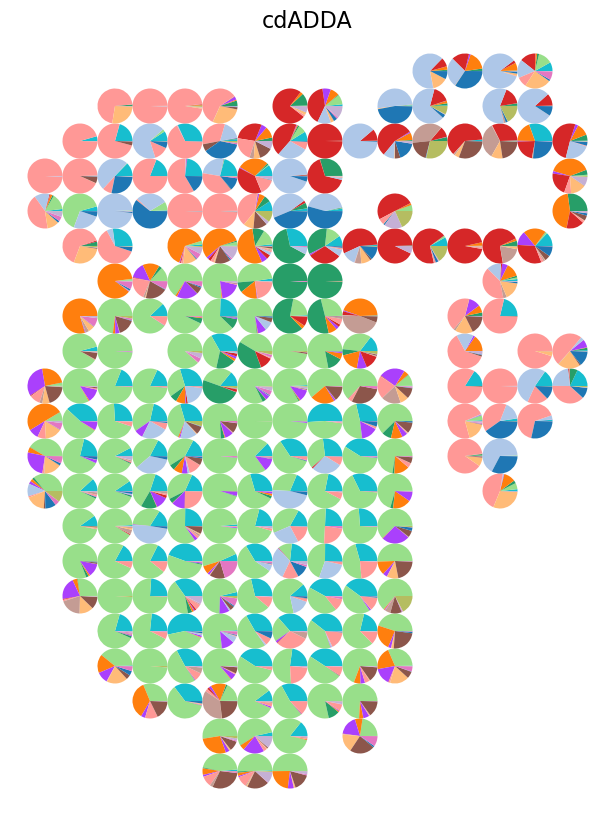

In [11]:
# Load the composition data (cell type proportions)
composition_data = pd.read_csv('D:\pythonplaces\MACD_github\MACD1\Result\dataset1/final_pro.csv')
# Ensure composition_data columns are in the correct order
cell_type_columns = composition_data.columns[1:]
print(cell_type_columns)
# Extract spot coordinates from stadata
coords = pd.DataFrame({
    'x': np.array(stadata.obs['x']),  # x-coordinates of spots
    'y': np.array(stadata.obs['y'])   # y-coordinates of spots
})
merged_data = pd.concat([composition_data, coords], axis=1)

# Prepare the plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')

# Loop through each spot and plot the composition as colored points
for i, row in merged_data.iterrows():
    # Get the (x, y) coordinates
    x, y = row['x'], row['y']
    
    # Get cell type proportions for the spot
    proportions = row[cell_type_columns].values*100
    
    # Extract cell types (should avoid 'Unnamed: 0' or any non-cell type columns)
    cell_types_in_row = row[cell_type_columns].index  # This should match cell types

    # Ensure we only use valid cell types
    valid_cell_types = [cell_type for cell_type in cell_types_in_row if cell_type in color_map]
    
    # Map each valid cell type to its corresponding color
    pie_colors = [color_map[cell_type] for cell_type in valid_cell_types]
    ax.pie(proportions, center=(x, y), radius=0.5,colors=pie_colors)

    # # Optional: Adjust the positioning of labels and text
    # for t in texts + autotexts:
    #     t.set(size=10, ha='center', color='black')

# Adjust plot limits based on data
ax.set_xlim(merged_data['x'].min() - 1, merged_data['x'].max() + 1)
ax.set_ylim(merged_data['y'].min() - 1, merged_data['y'].max() + 1)
ax.set_title("cdADDA", fontsize=16)
plt.savefig("D:\pythonplaces\MACD_github\img\dataset1/spatial_composition_plots_cdADDA.pdf", format="pdf", bbox_inches="tight")
# Show the plot
plt.show()



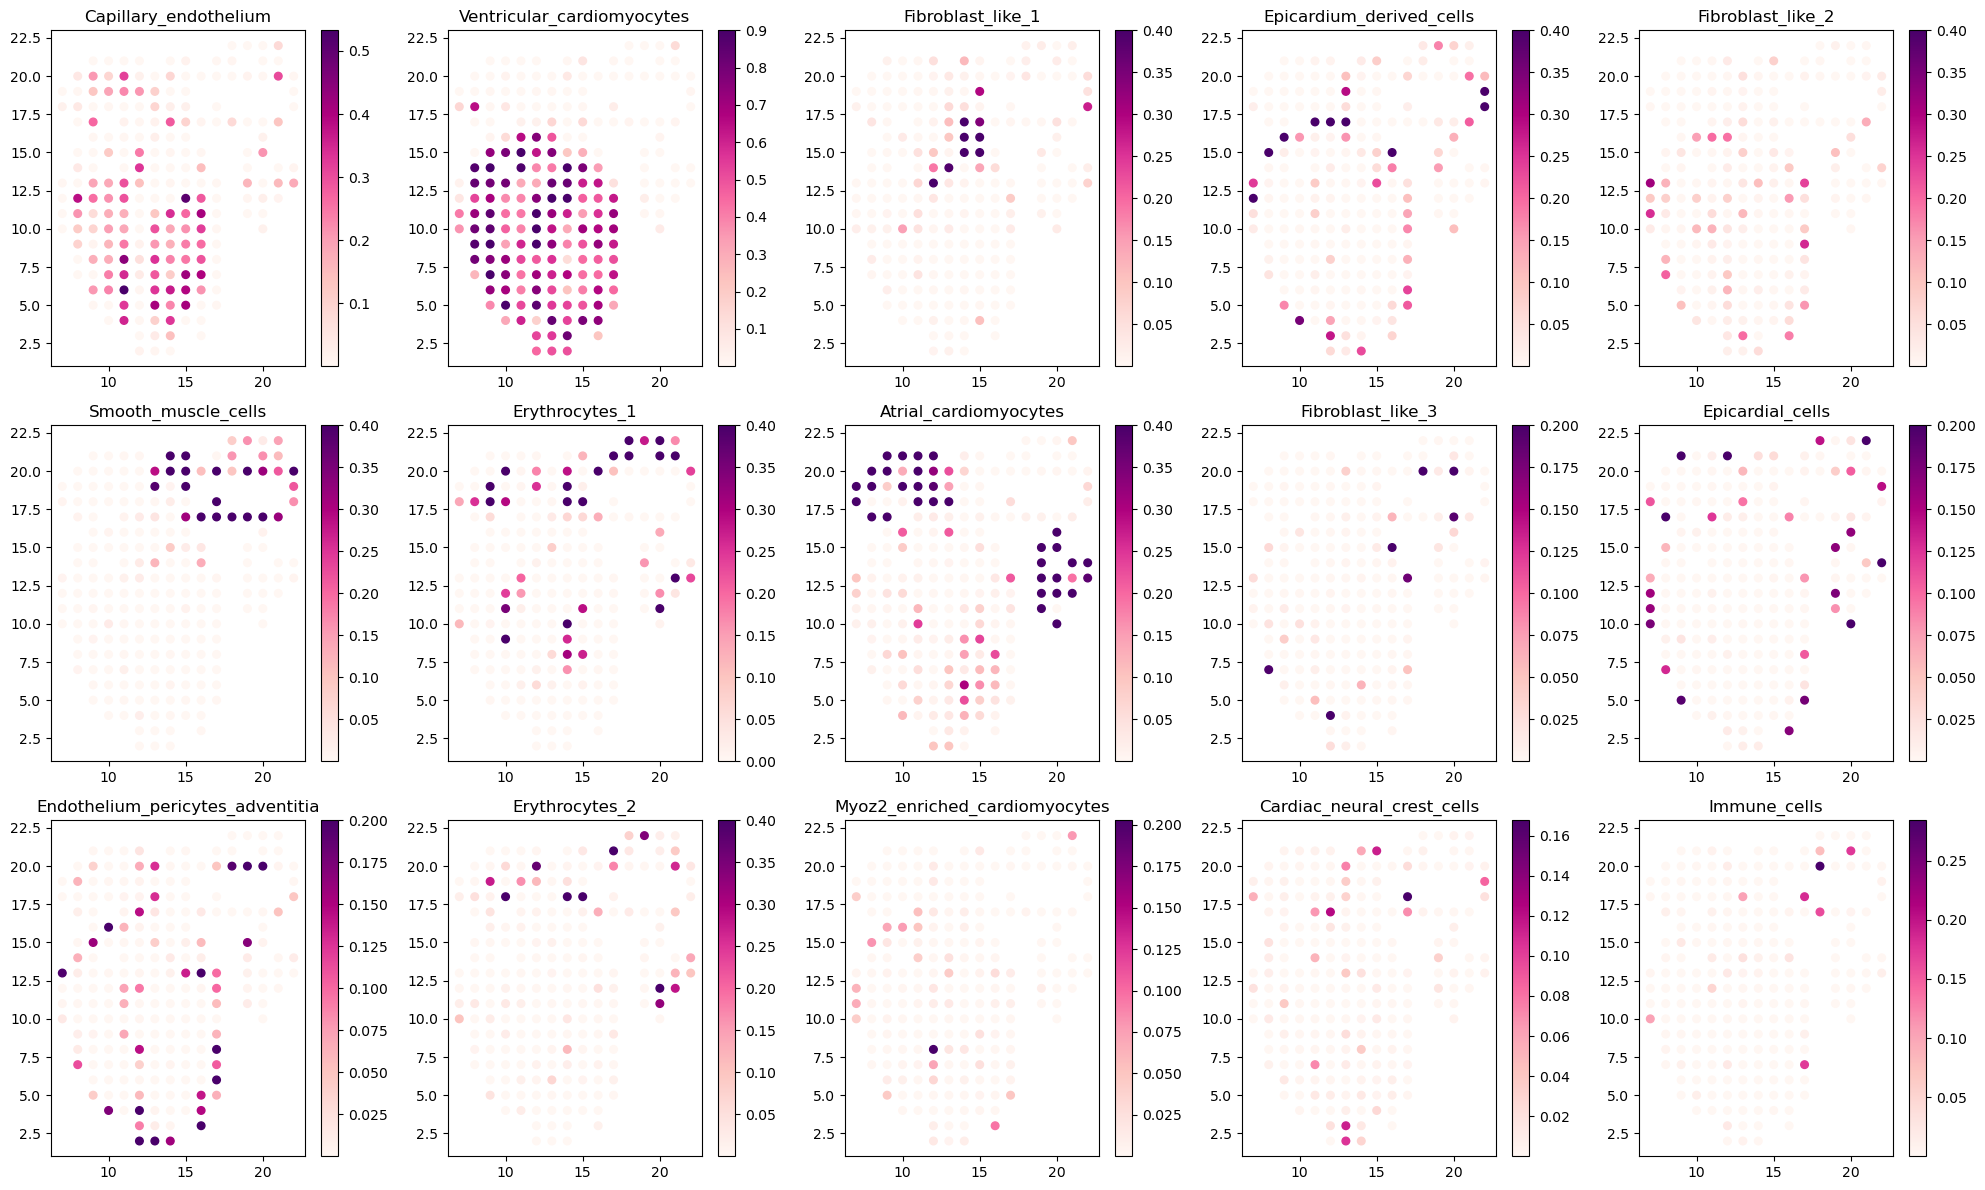

In [35]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
selected_genes = {
    'Atrial_cardiomyocytes': ['MYH6'],
    'Capillary_endothelium': ['PLVAP'],
    'Cardiac_neural_crest_cells': ['AIF1'],
    'Endothelium_pericytes_adventitia': ['CAV1'],
    'Epicardial_cells': ['TNNT1'],
    'Epicardium_derived_cells': ['LRRC17'],
    'Erythrocytes_1': ['SLC2A1'],
    'Erythrocytes_2': ['SNCA'],
    'Fibroblast_like_1': ['MFAP4'],
    'Fibroblast_like_2': ['DCN'],
    'Fibroblast_like_3': ['BGN'],
    'Immune_cells': ['LINC00682'],
    'Myoz2_enriched_cardiomyocytes': ['FABP3'],
    'Smooth_muscle_cells': ['OGN'],
    'Ventricular_cardiomyocytes': ['MYH7']
}
# Load the stdata (AnnData object)
st_file = "D:/pythonplaces/MACD_github/Datasets/preproced_data/dataset1/Real_STdata_filter.h5ad"
stadata = sc.read_h5ad(st_file)

# Get the spatial coordinates
x_coordinates = np.array(stadata.obs['x'])
y_coordinates = np.array(stadata.obs['y'])

# Load the results (expression values for different cell types)
file_path = 'D:/pythonplaces/MACD_github/MACD1/Result/dataset1/final_pro.csv'
result_df = pd.read_csv(file_path)

# Assuming columns in result_df represent different cell types
celltypes = result_df.columns[1:]

# Define titles for the subplots (use the same names as celltypes or custom titles)
titles = [f"{celltypes[i]}" for i in range(len(celltypes))]

# Create a 2x5 layout for plotting
fig, axes = plt.subplots(3, 5, figsize=(20, 12))

# Loop over each cell type and plot its expression
for i, celltype in enumerate(celltypes):
    celltype_expression = result_df[celltype].values  # Extract expression values for the current celltype

    ax = axes[i // 5, i % 5]  # 2x5 layout

    # Adjust vmax and vmin based on conditions or experiment
    if i == 1:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30, vmax=0.9)

    elif i >= 8 and i <= 10:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30, vmax=0.2)
    elif i >= 2 and i <= 7:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30, vmax=0.4)
    elif i == 11:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30, vmax=0.4)
    else:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30)

    ax.set_title(titles[i])  # Set title for each subplot

    # Add colorbar to the side of each subplot
    fig.colorbar(scatter, ax=ax, orientation='vertical')

# Adjust layout to prevent overlap and save the plot
plt.tight_layout()

# Save the figure as a PDF file
output_path = "D:/pythonplaces/MACD_github/img/dataset1/result_all.pdf"
plt.savefig(output_path, format="pdf", bbox_inches="tight")

# Display the plot
plt.show()


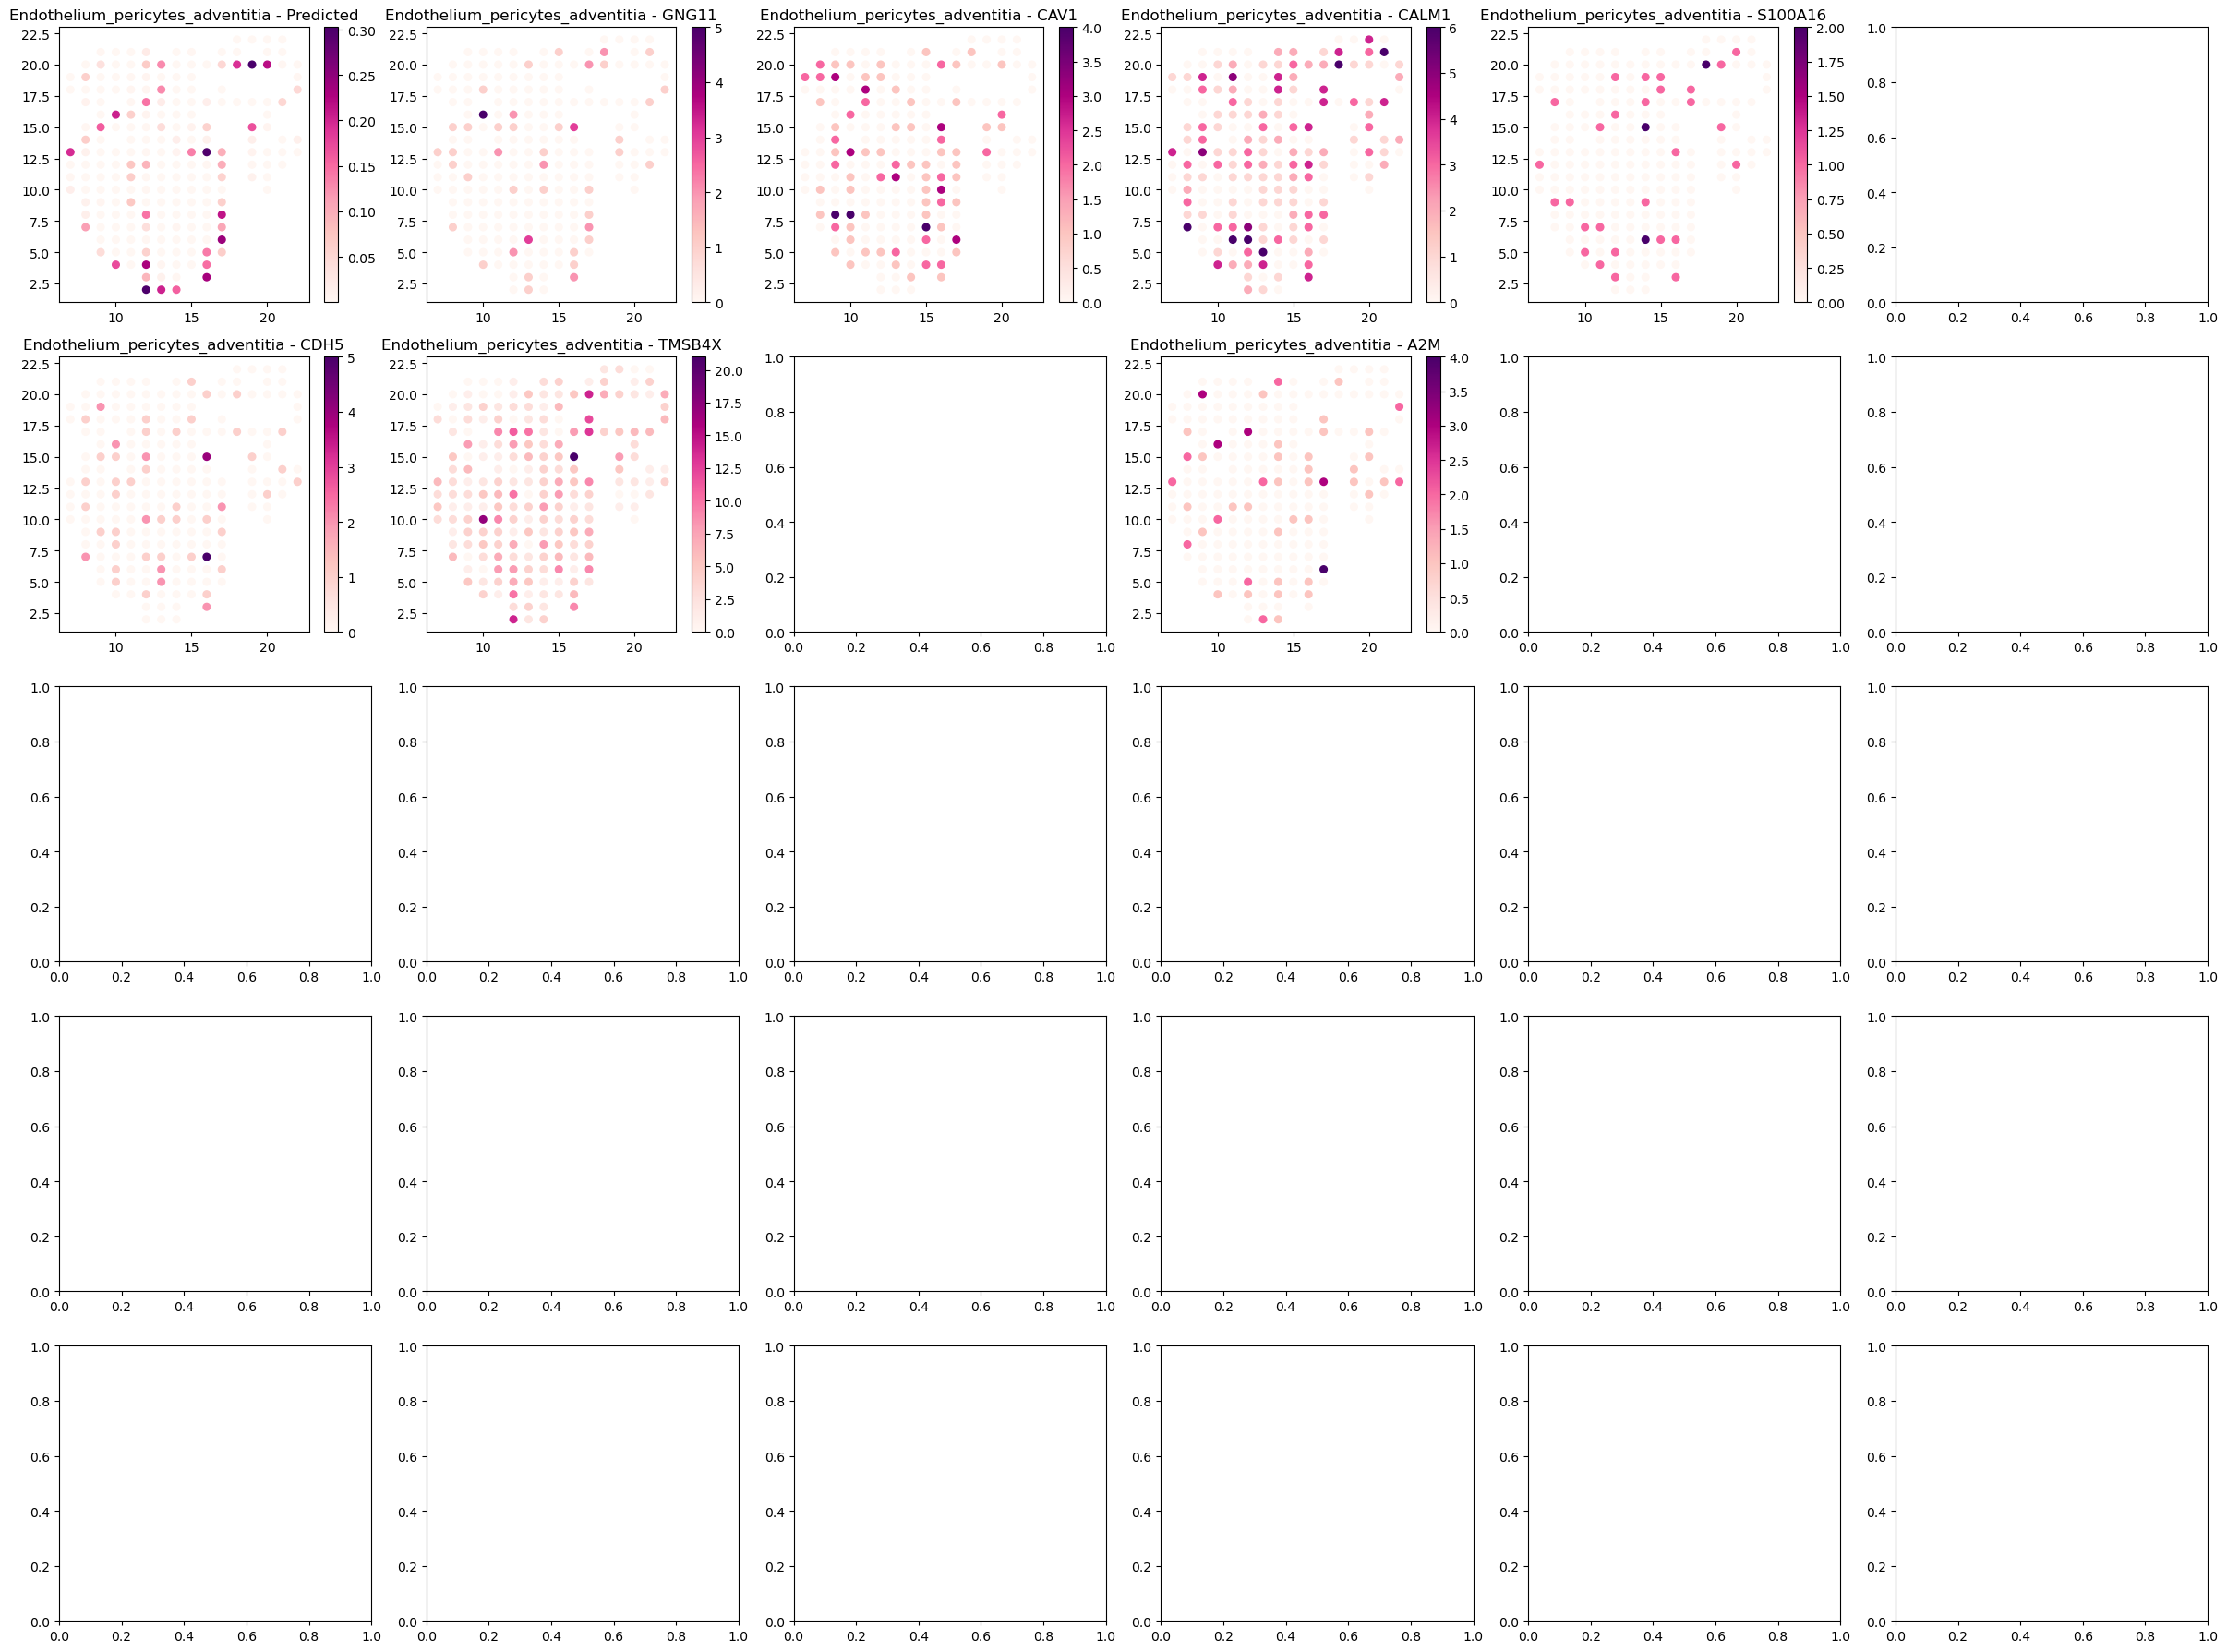

In [18]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the cell type and its marker genes
# celltype = 'Cardiac_neural_crest_cells'
# genes = ['AIF1', 'TYROBP', 'LAPTM5', 'VAMP8', 'C1QC', 'C1QB', 'C1QA', 'FCER1G', 'CYBA']
celltype ='Endothelium_pericytes_adventitia'
genes = ['GNG11', 'CAV1', 'CALM1', 'S100A16' ,'TMSB10', 'CDH5','TMSB4X', 'FKBP1A' ,'A2M']

# Load the stdata (AnnData object)
st_file = "D:/pythonplaces/MACD_github/Datasets/preproced_data/dataset1/Real_STdata_filter.h5ad"
stadata = sc.read_h5ad(st_file)

# Load the results (expression values for different cell types)
file_path = 'D:/pythonplaces/MACD_github/MACD1/Result/dataset1/final_pro.csv'
result_df = pd.read_csv(file_path)

# Get the spatial coordinates
x_coordinates = np.array(stadata.obs['x'])
y_coordinates = np.array(stadata.obs['y'])

# Create a 5x6 layout for plotting (30 subplots)
fig, axes = plt.subplots(5, 6, figsize=(24, 18))

# Flatten the axes to easily loop over
axes = axes.flatten()

# First plot: Predicted expression for the selected cell type
celltype_expression = result_df[celltype].values
ax_celltype = axes[0]
scatter_celltype = ax_celltype.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30)
ax_celltype.set_title(f"{celltype} - Predicted")  # Title for predicted expression
fig.colorbar(scatter_celltype, ax=ax_celltype, orientation='vertical')

# Loop over each gene in the list and plot its expression
for i, gene in enumerate(genes):
    if gene in stadata.var_names:
        # Get gene expression data from stadata
        gene_expression = stadata[:, gene].X.toarray().flatten()
        ax_gene = axes[i + 1]  # Use the next available axis
        scatter_gene = ax_gene.scatter(x_coordinates, y_coordinates, c=gene_expression, cmap='RdPu', s=30)
        ax_gene.set_title(f"{celltype} - {gene}")  # Set title with gene name
        fig.colorbar(scatter_gene, ax=ax_gene, orientation='vertical')

# Adjust layout to prevent overlap and display the plot
plt.tight_layout()
plt.show()


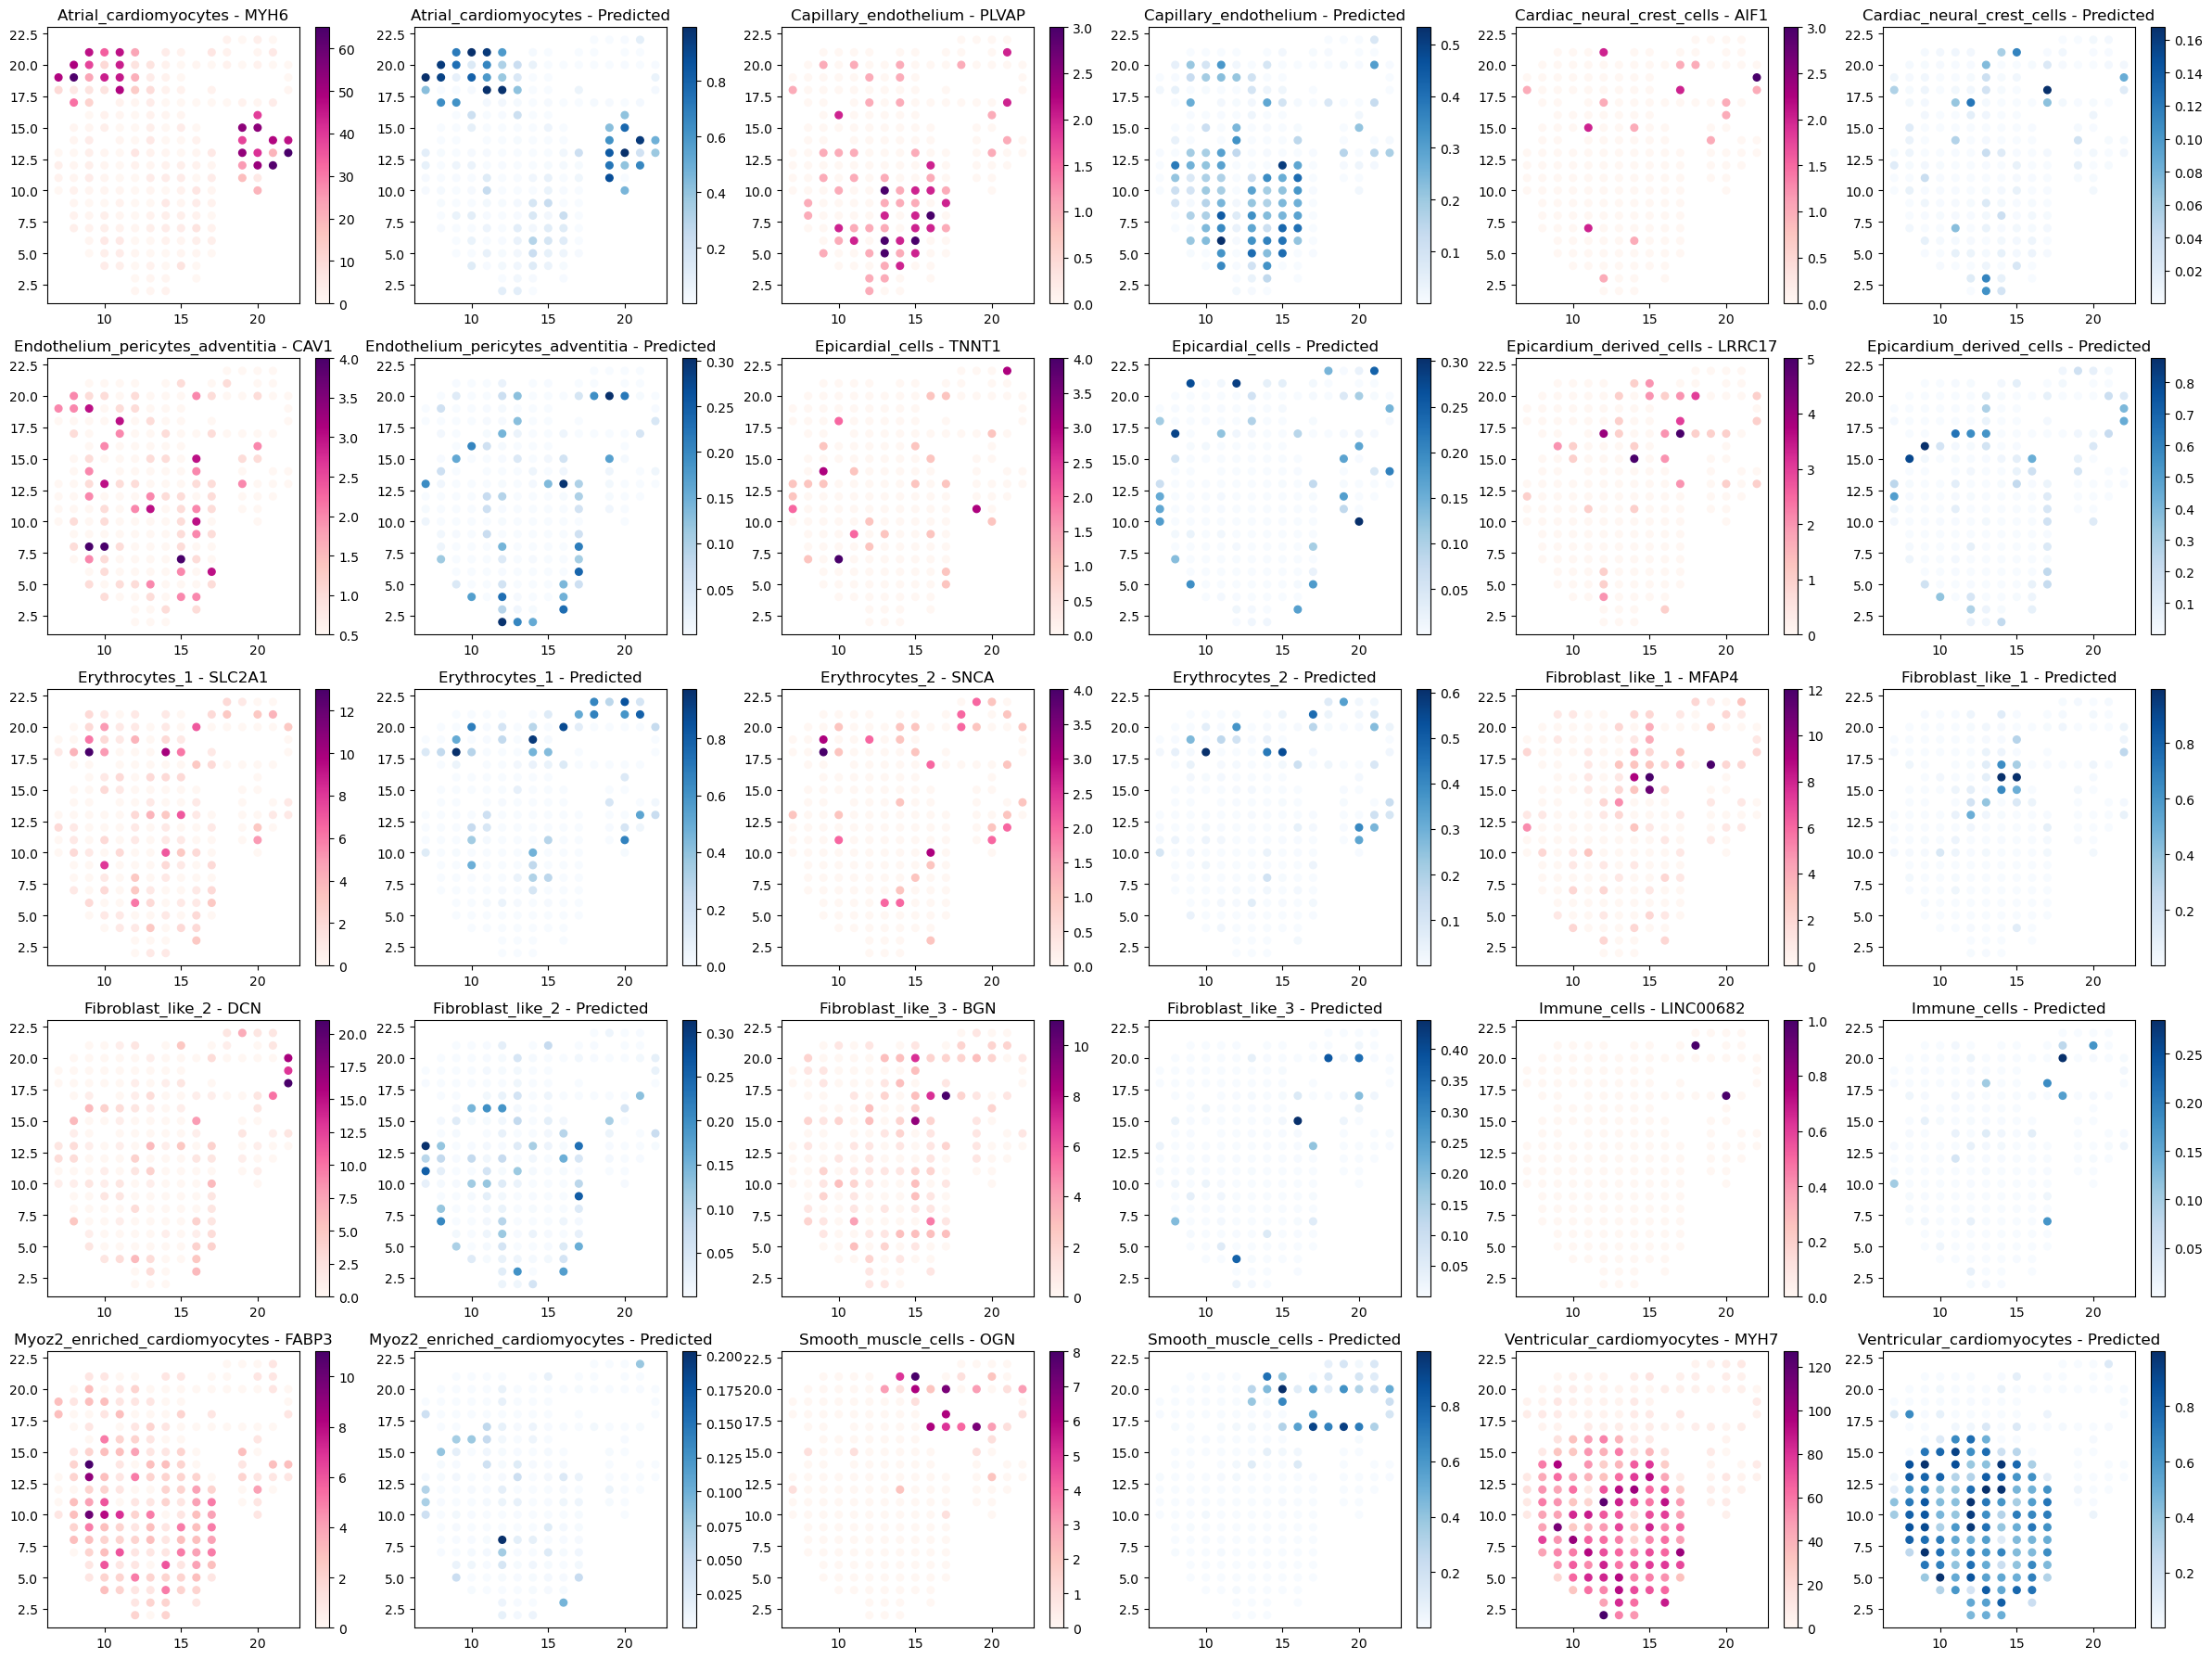

In [12]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the selected genes for each cell type
selected_genes = {
    'Atrial_cardiomyocytes': ['MYH6'],
    'Capillary_endothelium': ['PLVAP'],
    'Cardiac_neural_crest_cells': ['AIF1'],
    'Endothelium_pericytes_adventitia': ['CAV1'],
    'Epicardial_cells': ['TNNT1'],
    'Epicardium_derived_cells': ['LRRC17'],
    'Erythrocytes_1': ['SLC2A1'],
    'Erythrocytes_2': ['SNCA'],
    'Fibroblast_like_1': ['MFAP4'],
    'Fibroblast_like_2': ['DCN'],
    'Fibroblast_like_3': ['BGN'],
    'Immune_cells': ['LINC00682'],
    'Myoz2_enriched_cardiomyocytes': ['FABP3'],
    'Smooth_muscle_cells': ['OGN'],
    'Ventricular_cardiomyocytes': ['MYH7']
}

# Load the stdata (AnnData object)
st_file = "D:/pythonplaces/MACD_github/Datasets/preproced_data/dataset1/Real_STdata_filter.h5ad"
stadata = sc.read_h5ad(st_file)

# Load the results (expression values for different cell types)
file_path = 'D:/pythonplaces/MACD_github/MACD1/Result/dataset1/final_pro.csv'
result_df = pd.read_csv(file_path)

# Get the spatial coordinates
x_coordinates = np.array(stadata.obs['x'])
y_coordinates = np.array(stadata.obs['y'])

# Create a 5x6 layout for plotting (30 subplots)
fig, axes = plt.subplots(5, 6, figsize=(24, 18))

# Flatten the axes to easily loop over
axes = axes.flatten()

# Loop over each cell type and plot its marker gene expression and predicted celltype expression
for i, (celltype, genes) in enumerate(selected_genes.items()):
    # Check if the gene exists in the data
    for gene in genes:
        if gene in stadata.var_names:
            # Get gene expression data from stadata
            gene_expression = stadata[:, gene].X.toarray().flatten()

            # Get celltype expression data from result_df
            celltype_expression = result_df[celltype].values

            if i==1:
                ax_gene = axes[2*i]   
                scatter_gene = ax_gene.scatter(x_coordinates, y_coordinates, c=gene_expression, cmap='RdPu', s=30,vmax=3)
                ax_gene.set_title(f"{celltype} - {gene}")  # Set the title with gene name
                fig.colorbar(scatter_gene, ax=ax_gene, orientation='vertical')
                ax_celltype = axes[2*i + 1]   # For celltype expression
                scatter_celltype = ax_celltype.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='Blues', s=30)
                ax_celltype.set_title(f"{celltype} - Predicted")  # Set title for cell type prediction
                fig.colorbar(scatter_celltype, ax=ax_celltype, orientation='vertical')
            elif i==3:
                ax_gene = axes[2*i]   
                scatter_gene = ax_gene.scatter(x_coordinates, y_coordinates, c=gene_expression, cmap='RdPu', s=30,vmin=0.5)
                ax_gene.set_title(f"{celltype} - {gene}")  # Set the title with gene name
                fig.colorbar(scatter_gene, ax=ax_gene, orientation='vertical')
                ax_celltype = axes[2*i + 1]   # For celltype expression
                scatter_celltype = ax_celltype.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='Blues', s=30)
                ax_celltype.set_title(f"{celltype} - Predicted")  # Set title for cell type prediction
                fig.colorbar(scatter_celltype, ax=ax_celltype, orientation='vertical')
            else:
                ax_gene = axes[2*i]   
                scatter_gene = ax_gene.scatter(x_coordinates, y_coordinates, c=gene_expression, cmap='RdPu', s=30)
                ax_gene.set_title(f"{celltype} - {gene}")  # Set the title with gene name
                fig.colorbar(scatter_gene, ax=ax_gene, orientation='vertical')
                ax_celltype = axes[2*i + 1]   # For celltype expression
                scatter_celltype = ax_celltype.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='Blues', s=30)
                ax_celltype.set_title(f"{celltype} - Predicted")  # Set title for cell type prediction
                fig.colorbar(scatter_celltype, ax=ax_celltype, orientation='vertical')
            
    
            
            

# Adjust layout to prevent overlap and save the plot
plt.tight_layout()

# Save the figure as a PDF file
# output_path = "D:/pythonplaces/MACD_github/img/dataset1/result_genes_and_celltypes_side_by_side.pdf"
# plt.savefig(output_path, format="pdf", bbox_inches="tight")

# Display the plot
plt.show()


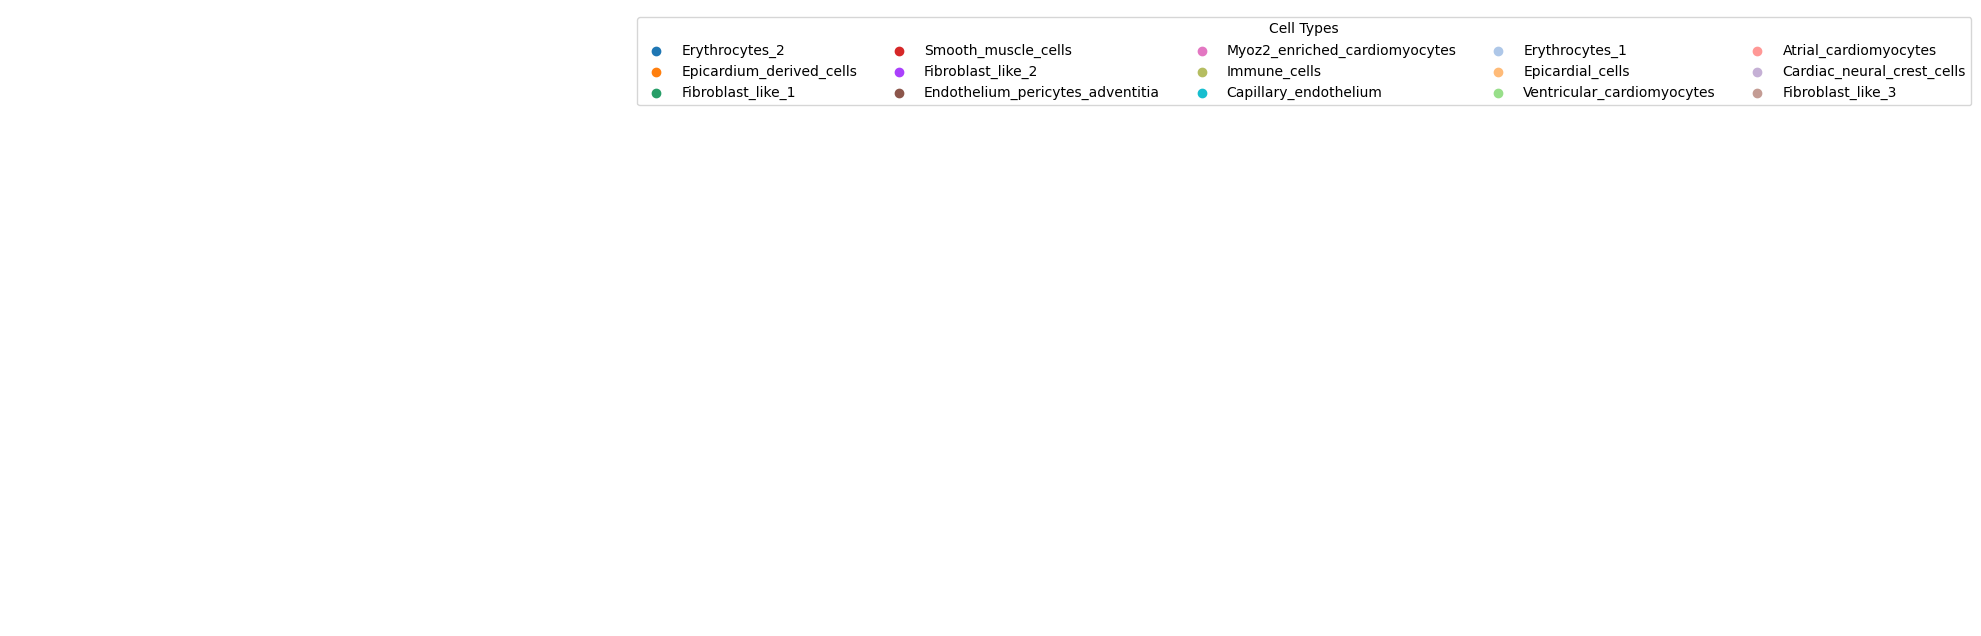

In [5]:
plt.figure(figsize=(8, 8))  # 可选，设置图像的大小

# 为每个细胞类型创建一个点
for cell_type, color in color_map.items():
    plt.scatter([], [], color=color, label=cell_type)  # 为空数据点创建图例

# 添加图例，分为两列
plt.legend(title="Cell Types", loc='upper left', bbox_to_anchor=(1, 1), ncol=5)

# 显示图像
plt.axis('off')  # 可选，关闭坐标轴
plt.savefig("D:/pythonplaces/MACD_github/img/dataset1/spatial_composition_plots_cdADDA_tuli.pdf", format="pdf", bbox_inches="tight")
plt.show()

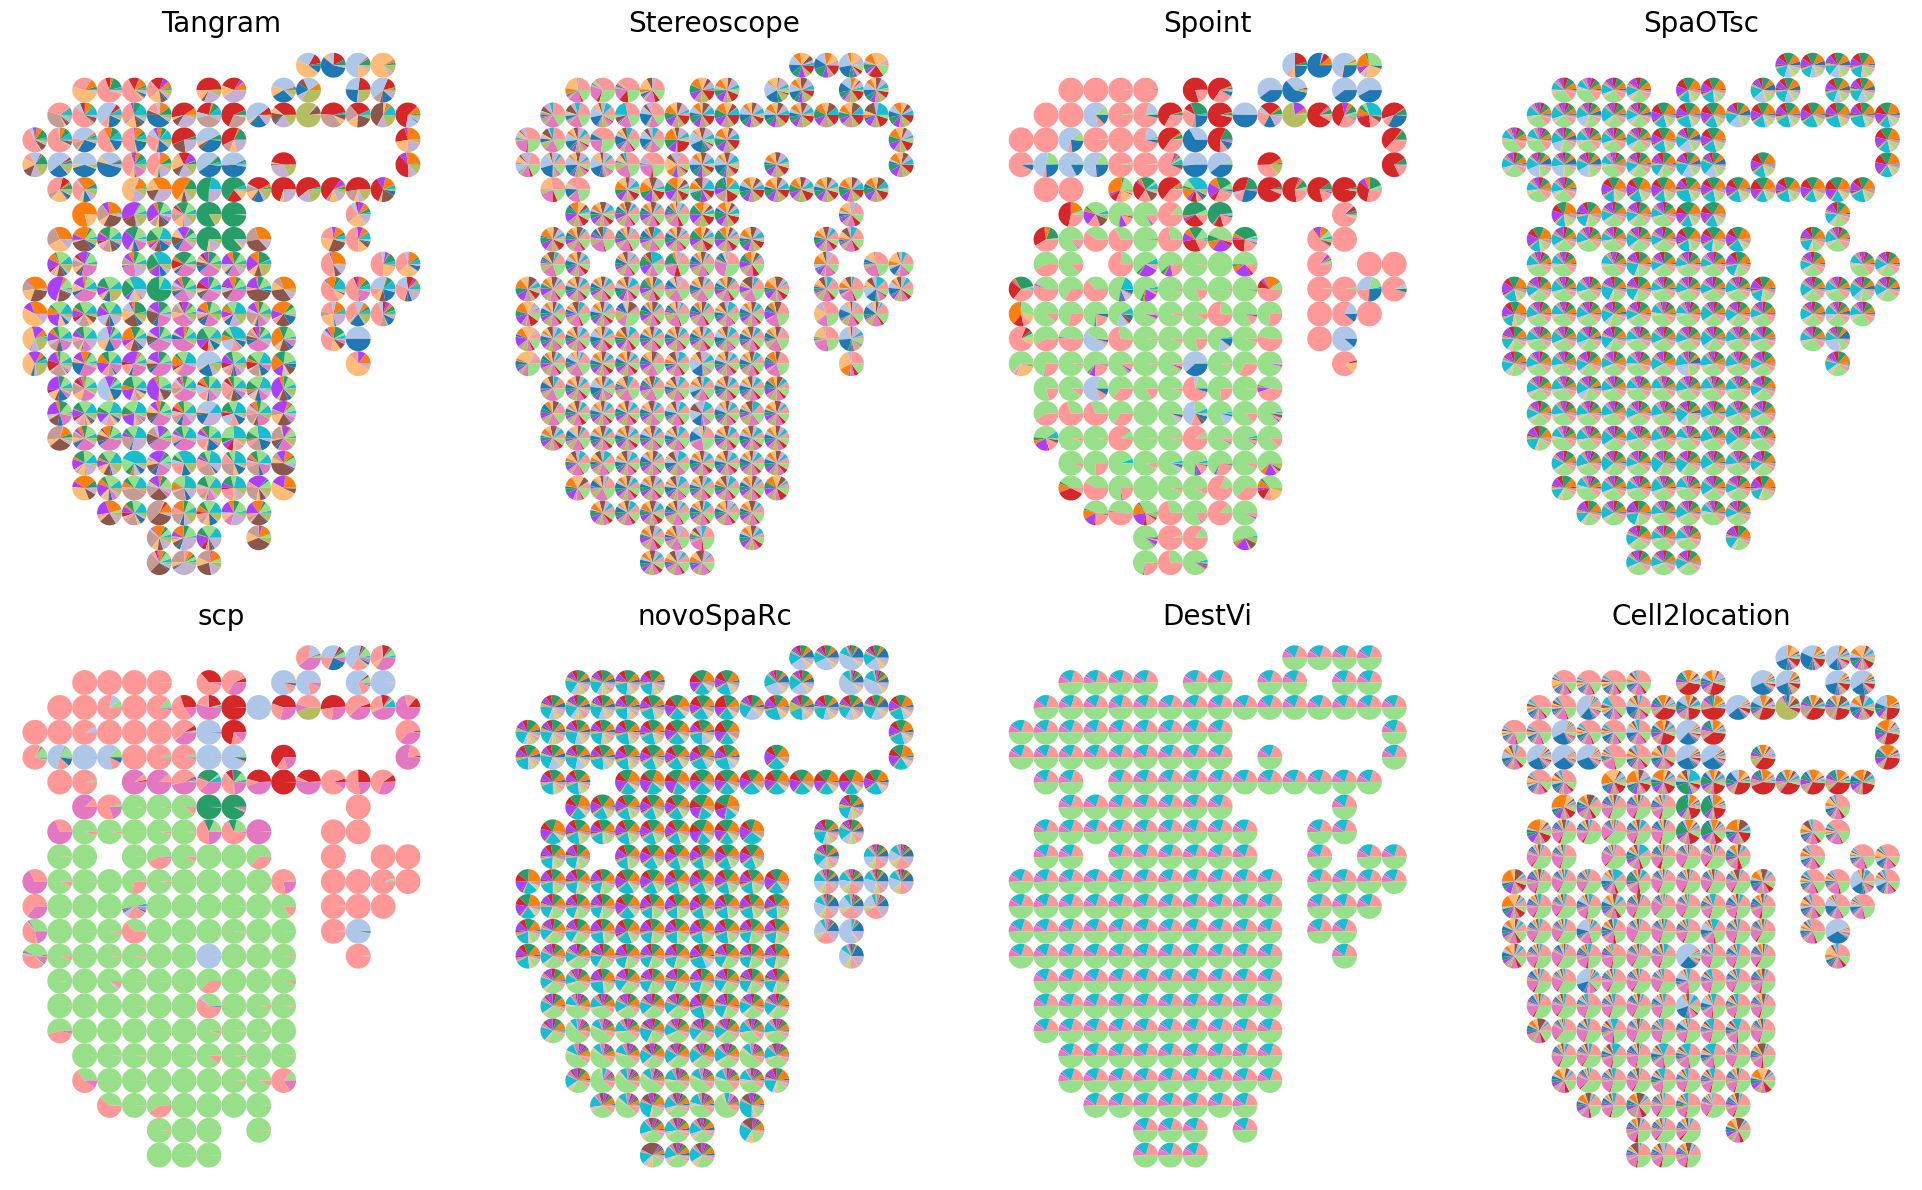

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have 7 datasets, such as:
# composition_data1, composition_data2, ..., composition_data7
# For simplicity, let's assume these are stored in a list.
composition_data_files = [
    'D:\pythonplaces\MACD_github\Baselines\Tangram\Result\dataset1\Tangram_result.csv',
    'D:\pythonplaces\MACD_github\Baselines\Stereoscope\Result\dataset1\Stereoscope_result.csv',
    'D:\pythonplaces\MACD_github\Baselines\Spoint\Result\dataset1\proportion.csv',
    'D:\pythonplaces\MACD_github\Baselines\SpaOTsc-master\Result\dataset1\SpaOTsc_decon.csv',
    'D:\pythonplaces\MACD_github\Baselines\scpDeconv\Result\dataset1/final_preds.csv',
    'D:\pythonplaces\MACD_github\Baselines/novoSpaRc\Result\dataset1/novoSpaRc_decon.csv',
    'D:\pythonplaces\MACD_github\Baselines\DestVi\Result\dataset1\DestVI_result.csv',
    'D:\pythonplaces\MACD_github\Baselines\Cell2location\Result\dataset1\Cell2location_result2.csv'
]
title=['Tangram','Stereoscope','Spoint','SpaOTsc','scp','novoSpaRc','DestVi','Cell2location']
# Create a 2x4 grid for the plots (2 rows, 4 columns)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through each of the 7 datasets and plot the composition
for i, composition_data_file in enumerate(composition_data_files):
    # Load the dataset
    composition_data = pd.read_csv(composition_data_file)
    
    # Extract the cell type columns (assuming the first column is not a cell type)
    cell_type_columns = composition_data.columns[1:]
    
    # Extract spot coordinates from stadata (assuming stadata is defined)
    coords = pd.DataFrame({
        'x': np.array(stadata.obs['x']),  # x-coordinates of spots
        'y': np.array(stadata.obs['y'])   # y-coordinates of spots
    })
    
    # Combine composition data and coordinates
    merged_data = pd.concat([composition_data, coords], axis=1)
    
    # Get the current axis (subplot) where this plot will go
    ax = axes[i]
    
    # Loop through each spot and plot the composition as colored points
    for j, row in merged_data.iterrows():
        # Get the (x, y) coordinates
        x, y = row['x'], row['y']
        
        # Get cell type proportions for the spot
        proportions = row[cell_type_columns].values * 100
        
        # Extract cell types (should avoid 'Unnamed: 0' or any non-cell type columns)
        cell_types_in_row = row[cell_type_columns].index  # This should match cell types
        
        # Ensure we only use valid cell types
        valid_cell_types = [cell_type for cell_type in cell_types_in_row if cell_type in color_map]
        
        # Map each valid cell type to its corresponding color
        pie_colors = [color_map[cell_type] for cell_type in valid_cell_types]
        
        # Plot the pie chart on the current axis
        ax.pie(proportions, center=(x, y), radius=0.5, colors=pie_colors)
    
    # Set properties for the current subplot
    ax.set_aspect('equal')
    ax.set_xlim(merged_data['x'].min() - 1, merged_data['x'].max() + 1)
    ax.set_ylim(merged_data['y'].min() - 1, merged_data['y'].max() + 1)
    ax.set_title(title[i], fontsize=20)

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.savefig("D:\pythonplaces\MACD_github\img\dataset1/spatial_composition_plots.pdf", format="pdf", bbox_inches="tight")
# Show the plot
plt.show()


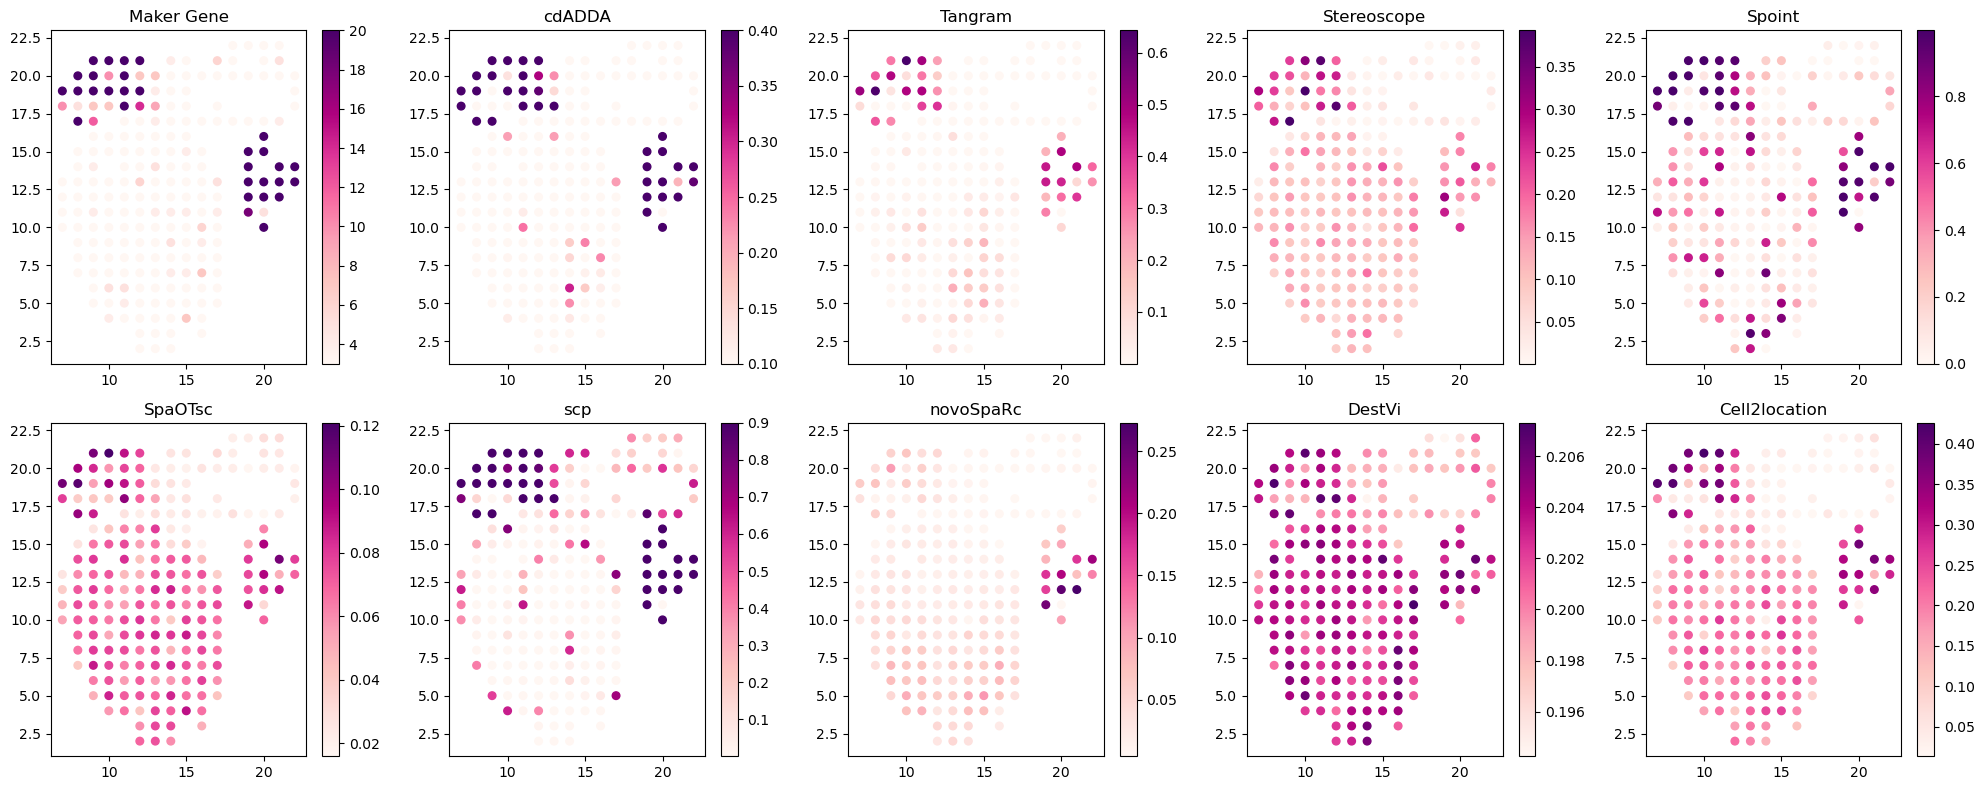

In [4]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

# Load stdata (AnnData object)
st_file = "D:/pythonplaces/MACD_github/Datasets/preproced_data/dataset1/Real_STdata_filter.h5ad"
stadata = sc.read_h5ad(st_file)
# Coordinates and gene of interest'Atrial_cardiomyocytes': ['MYH6'],
genes_of_interest = ['MYH6']
celltype = ['Atrial_cardiomyocytes']
x_coordinates = np.array(stadata.obs['x'])
y_coordinates = np.array(stadata.obs['y'])

# Create 2x5 layout for plotting
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

# List of results (example paths; replace with actual paths)
composition_data_files = [
    "D:/pythonplaces/MACD_github/Datasets/preproced_data/dataset1/Real_STdata_filter.h5ad",
    'D:/pythonplaces/MACD_github/MACD1/Result/dataset1/final_pro.csv',
    'D:/pythonplaces/MACD_github/Baselines/Tangram/Result/dataset1/Tangram_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Stereoscope/Result/dataset1/Stereoscope_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Spoint/Result/dataset1/proportion.csv',
    'D:/pythonplaces/MACD_github/Baselines/SpaOTsc-master/Result/dataset1/SpaOTsc_decon.csv',
    'D:/pythonplaces/MACD_github/Baselines/scpDeconv/Result/dataset1/final_preds.csv',
    'D:/pythonplaces/MACD_github/Baselines/novoSpaRc/Result/dataset1/novoSpaRc_decon.csv',
    'D:/pythonplaces/MACD_github/Baselines/DestVi/Result/dataset1/DestVI_result.csv',
    'D:\pythonplaces\MACD_github\Baselines\Cell2location\Result\dataset1\Cell2location_result2.csv'
]
titles = [ 'Maker Gene','cdADDA', 'Tangram', 'Stereoscope', 'Spoint',
    'SpaOTsc', 'scp', 'novoSpaRc', 'DestVi', 'Cell2location'
]

for i, file_path in enumerate(composition_data_files):
    # Load the result for the ith method 
    if i==0:
        celltype_expression=stadata[:, genes_of_interest].X.toarray()
    else:
        result_df = pd.read_csv(file_path)
        if 'Atrial_cardiomyocytes' in result_df.columns:
           celltype_expression = result_df['Atrial_cardiomyocytes'].values
        

    # Plot for the corresponding method
    ax = axes[i // 5, i % 5]  # 2x5 layout
    if i==0:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30,vmax=20,vmin=3)
    elif i==1:
    
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30,vmax=0.4,vmin=0.1)
    elif i==6:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30,vmax=0.9)
    else:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30)
    ax.set_title(titles[i])
    # Add colorbar
    fig.colorbar(scatter, ax=ax, orientation='vertical')

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig("D:\pythonplaces\MACD_github\img\dataset1/result.pdf", format="pdf", bbox_inches="tight")
plt.show()


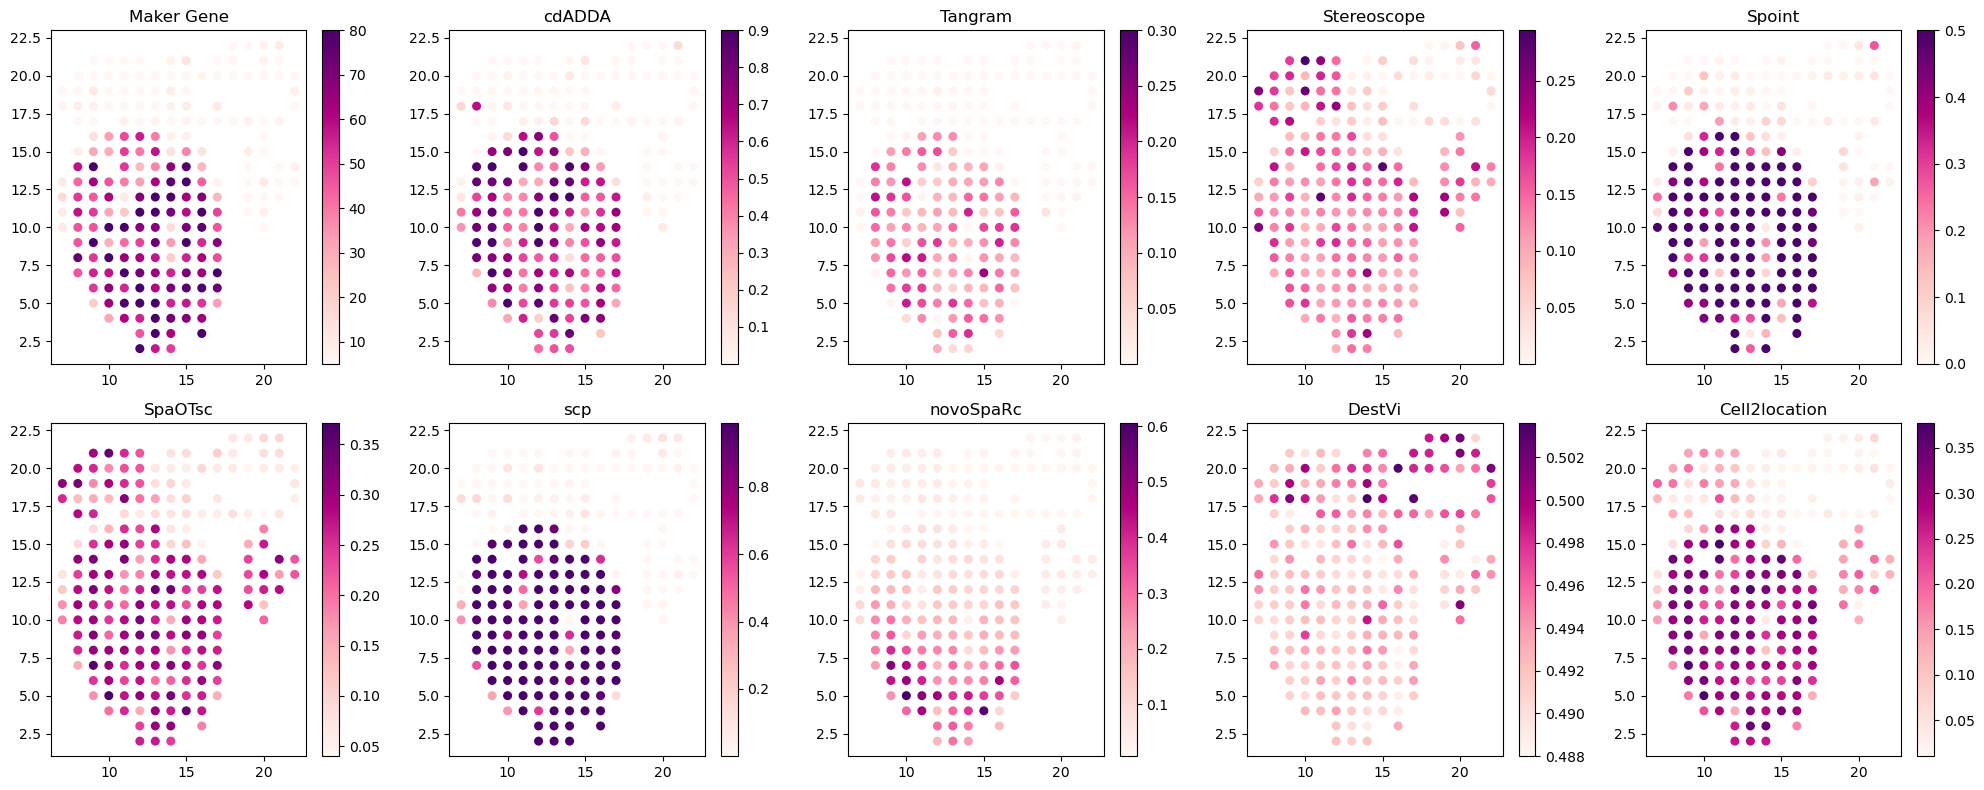

In [14]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

# Load stdata (AnnData object)
st_file = "D:/pythonplaces/MACD_github/Datasets/preproced_data/dataset1/Real_STdata_filter.h5ad"
stadata = sc.read_h5ad(st_file)
# Coordinates and gene of interest'Ventricular_cardiomyocytes': ['MYH7']
genes_of_interest = ['MYH7']
celltype = ['Ventricular_cardiomyocytes']
x_coordinates = np.array(stadata.obs['x'])
y_coordinates = np.array(stadata.obs['y'])

# Create 2x5 layout for plotting
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

# List of results (example paths; replace with actual paths)
composition_data_files = [
    "D:/pythonplaces/MACD_github/Datasets/preproced_data/dataset1/Real_STdata_filter.h5ad",
    'D:/pythonplaces/MACD_github/MACD1/Result/dataset1/final_pro.csv',
    'D:/pythonplaces/MACD_github/Baselines/Tangram/Result/dataset1/Tangram_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Stereoscope/Result/dataset1/Stereoscope_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Spoint/Result/dataset1/proportion.csv',
    'D:/pythonplaces/MACD_github/Baselines/SpaOTsc-master/Result/dataset1/SpaOTsc_decon.csv',
    'D:/pythonplaces/MACD_github/Baselines/scpDeconv/Result/dataset1/final_preds.csv',
    'D:/pythonplaces/MACD_github/Baselines/novoSpaRc/Result/dataset1/novoSpaRc_decon.csv',
    'D:/pythonplaces/MACD_github/Baselines/DestVi/Result/dataset1/DestVI_result.csv',
    'D:\pythonplaces\MACD_github\Baselines\Cell2location\Result\dataset1\Cell2location_result2.csv'
]
titles = [ 'Maker Gene','cdADDA', 'Tangram', 'Stereoscope', 'Spoint',
    'SpaOTsc', 'scp', 'novoSpaRc', 'DestVi', 'Cell2location'
]

for i, file_path in enumerate(composition_data_files):
    # Load the result for the ith method 
    if i==0:
        celltype_expression=stadata[:, genes_of_interest].X.toarray()
    else:
        result_df = pd.read_csv(file_path)
        if 'Ventricular_cardiomyocytes' in result_df.columns:
           celltype_expression = result_df['Ventricular_cardiomyocytes'].values
        

    # Plot for the corresponding method
    ax = axes[(i) // 5, (i) % 5]  # 2x5 layout
    if i==1:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30,vmax=0.9)
    elif i==0:
         scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30,vmax=80,vmin=5)
    elif i==4:
         scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30,vmax=0.5)
    elif i==2:
         scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30,vmax=0.3)
    elif i==6:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30,vmax=0.99)
    else:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30)
    ax.set_title(titles[i])
    # Add colorbar
    fig.colorbar(scatter, ax=ax, orientation='vertical')

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig("D:\pythonplaces\MACD_github\img\dataset1/result1.pdf", format="pdf", bbox_inches="tight")
plt.show()


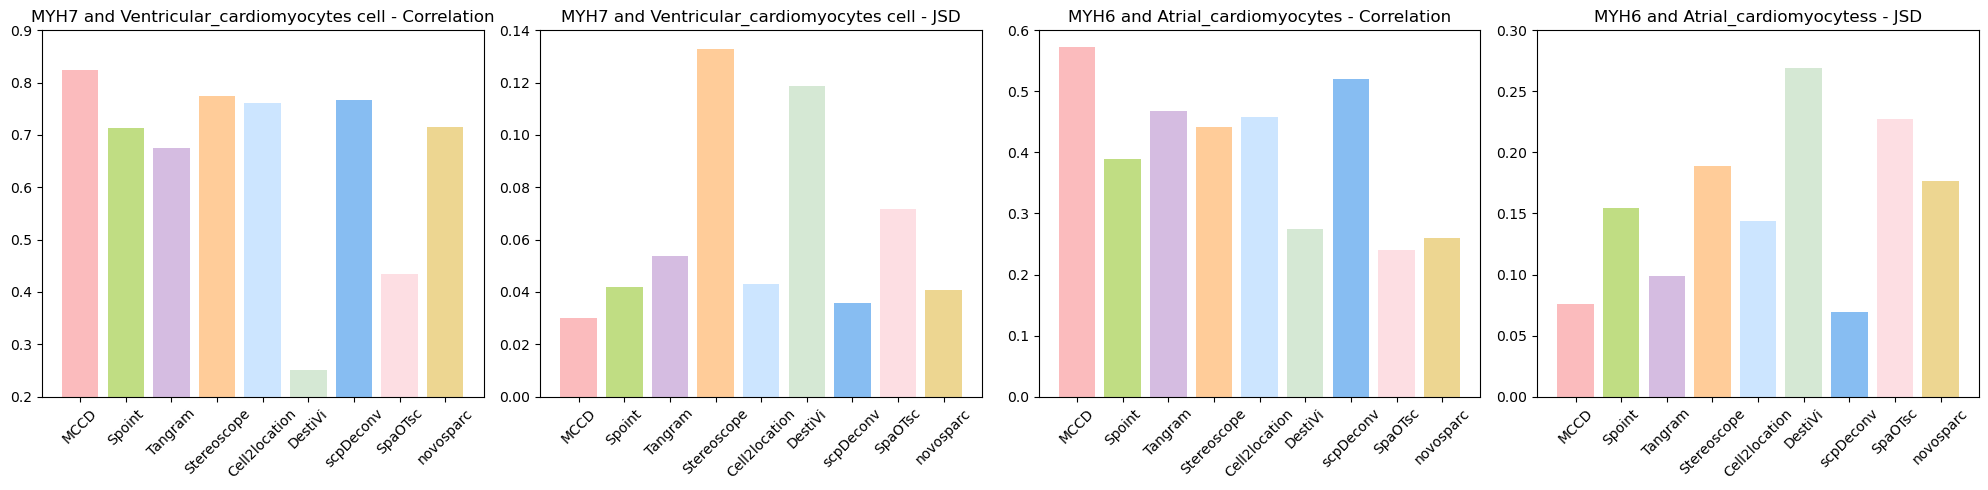

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 定义数据
methods = ['MCCD','Spoint','Tangram', 'Stereoscope', 'Cell2location', 'DestiVi', 'scpDeconv','SpaOTsc','novosparc' ]
corr_values_1 = [0.8242,0.7125,0.6758,0.7738,0.7613,0.25,0.7678,0.4339,0.7152]
jsd_values_1 = [0.0301,0.0419,0.0536,	0.133,	0.0429,	0.1187,	0.0357,0.0719,0.0408		]

corr_values_2 = [0.5721,0.3886,0.4678,	0.4423	,0.4573,	0.274,	0.5211,	0.2397,0.2596]
jsd_values_2 = [0.0757,	0.1542,	0.0990,0.1887,0.1442,0.2694,	0.0692,0.2271,0.1768]

# 创建数据框
data_1 = {'Methods': methods, 'Correlation': corr_values_1, 'JSD': jsd_values_1}
data_2 = {'Methods': methods, 'Correlation': corr_values_2, 'JSD': jsd_values_2}

df_1 = pd.DataFrame(data_1)
df_2 = pd.DataFrame(data_2)
colors = [
        "#FBBBBD", "#C0DD83", "#D5BCE1", "#FFCC99",
        "#CCE5FF",  "#D5E8D4", "#87BDF2",
        "#FDDEE3", "#EDD691", "#A068A1"
    ]
# colors=['#219723','#4889F1','#76608A','#FA6800','#A0522D','#1BA1E2','#647687']
# 设置图形大小
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# 绘制第一个矩阵
axes[0].bar(df_1['Methods'], df_1['Correlation'], color=colors)
axes[0].set_title('MYH7 and Ventricular_cardiomyocytes cell - Correlation')
axes[0].set_ylim(0.2, 0.9)
axes[0].tick_params(axis='x', rotation=45)

# 绘制第二个矩阵
axes[1].bar(df_1['Methods'], df_1['JSD'], color=colors)
axes[1].set_title('MYH7 and Ventricular_cardiomyocytes cell - JSD')
axes[1].set_ylim(0, 0.14)
axes[1].tick_params(axis='x', rotation=45)

# 绘制第三个矩阵
axes[2].bar(df_2['Methods'], df_2['Correlation'], color=colors)
axes[2].set_title('MYH6 and Atrial_cardiomyocytes - Correlation')
axes[2].set_ylim(0, 0.6)
axes[2].tick_params(axis='x', rotation=45)

# 绘制第四个矩阵
axes[3].bar(df_2['Methods'], df_2['JSD'], color=colors)
axes[3].set_title('MYH6 and Atrial_cardiomyocytess - JSD')
axes[3].set_ylim(0, 0.3)
axes[3].tick_params(axis='x', rotation=45)
for ax in axes:
    ax.grid(False)

# 调整子图间距
plt.tight_layout()
# 保存图像
plt.savefig("D:\pythonplaces\MACD_github\img\dataset1/result4.pdf", format="pdf", bbox_inches="tight")

# 显示图像
plt.show()

<Figure size 1000x800 with 0 Axes>

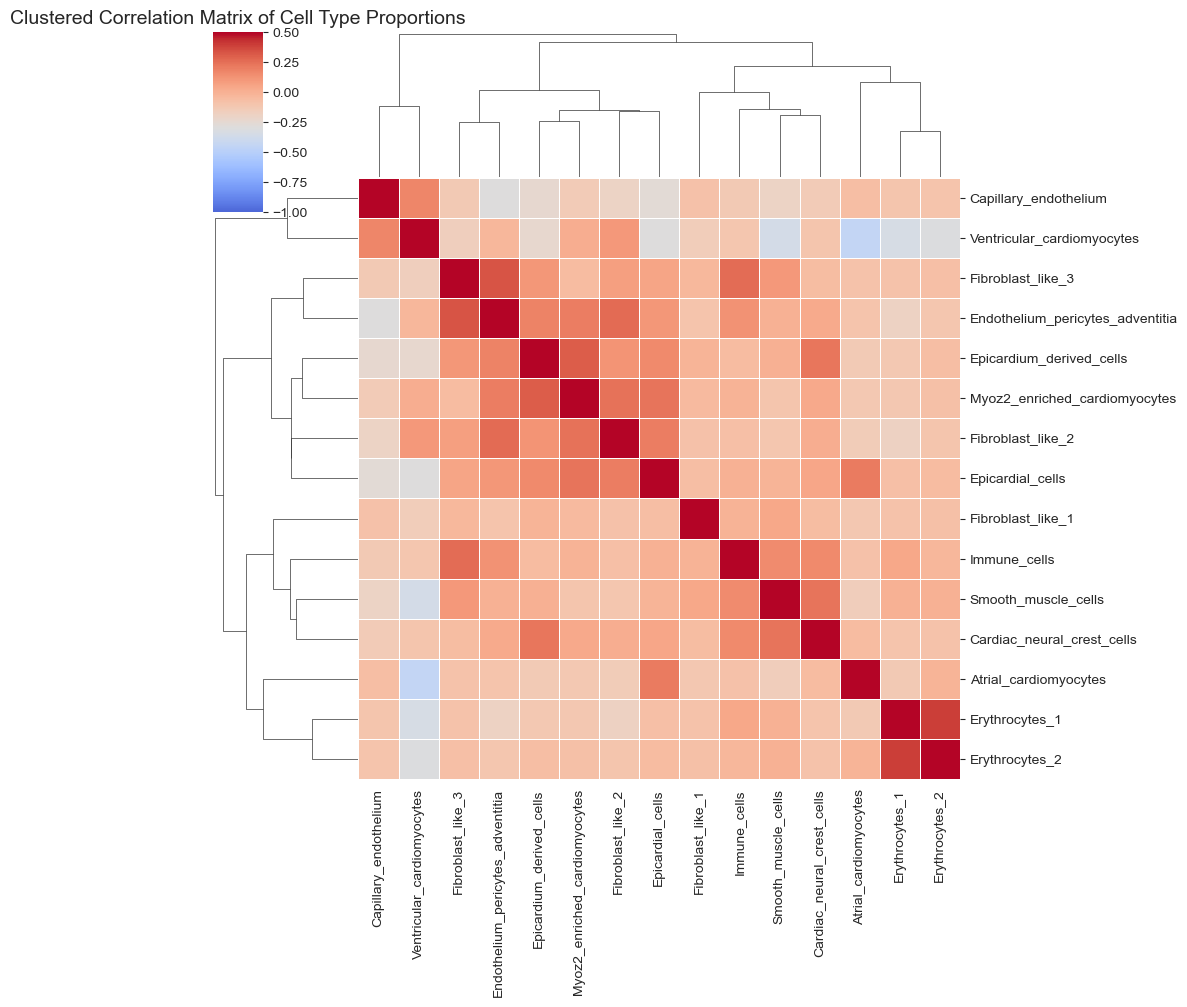

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 读取细胞组成和坐标数据
file_path = 'D:/pythonplaces/MACD_github/MACD1/Result/dataset1/final_pro.csv'
result_df = pd.read_csv(file_path)

# 获取细胞类型列表（假设第一列是ID或坐标，剩下的列是细胞类型的丰度）
celltypes = result_df.columns[1:]  # 第一列假设是非丰度数据（如spot ID）

# 获取每个spot的细胞类型丰度数据
cell_abundance = result_df.iloc[:, 1:].values  # 细胞类型丰度矩阵

# ----------- 计算细胞类型之间的相关性 -----------
# 初始化相关性矩阵
correlation_matrix = np.zeros((len(celltypes), len(celltypes)))

# 计算细胞类型之间的相关性（使用 Pearson 相关系数）
for i, cell_type_1 in enumerate(celltypes):
    for j, cell_type_2 in enumerate(celltypes):
        # if i == j:
        #     correlation_matrix[i, j] = 0  # 对角线设为 0
        # else:
            # 获取两种细胞类型在所有采样点的丰度
            abundance_1 = cell_abundance[:, i]
            abundance_2 = cell_abundance[:, j]

            # 计算皮尔逊相关系数
            corr, _ = pearsonr(abundance_1, abundance_2)
            correlation_matrix[i, j] = corr

# 转换为 DataFrame 方便可视化
correlation_df = pd.DataFrame(correlation_matrix, index=celltypes, columns=celltypes)

# ----------- 进行层次聚类并可视化 -----------
plt.figure(figsize=(10, 8))

# 使用 seaborn.clustermap 进行聚类
clustergrid = sns.clustermap(
    correlation_df, 
    method='ward',  # 使用 Ward 层次聚类方法
    metric='euclidean',  # 使用欧几里得距离进行聚类
    cmap="coolwarm",  # 颜色映射
    vmin=-1, vmax=0.5, center=-0.3,  # 颜色范围
    linewidths=0.5,  # 热图边框线宽
    figsize=(10, 10)  # 画布大小
)

# 添加标题
plt.title("Clustered Correlation Matrix of Cell Type Proportions", fontsize=14)

# 保存聚类热图
output_path = "D:/pythonplaces/MACD_github/img/dataset1/heatmap_clustered.pdf"
plt.savefig(output_path, format="pdf", bbox_inches="tight")

# 显示图像
plt.show()
